# Insurance Claim Fraud Detection


# Problem Statement:

Business case:

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

In [8]:
#Importing the necessary Libraries

# linear algebra
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#data processing
import pandas as pd

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

#Alogithms
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier


import joblib

# Importing the dataset

In [9]:
df=pd.read_csv('Automobile_insurance_fraud.csv')
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

.The dataset contains the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.

.The dataset contains both categorical and numerical columns.Here "fraud_reported" is our target column, Since it has two categories, it is a "classification problem" and we need to predict if an insurance claim is fraudulent or not

# Exploratory Data Analysis(EDA)


In [10]:
#checking the top5 rows
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [11]:
#Checking last 5 rows
df.tail()

months_as_customer  age  policy_number policy_bind_date policy_state  \
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[5 rows x 40 columns]

In [12]:
#checking the sample
df.sample(2)

months_as_customer  age  policy_number policy_bind_date policy_state  \
128                 274   43         517240       13-05-2001           OH   
237                 107   26         261119       21-03-1997           IL   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
128    100/300               2000                1352.31               0   
237   500/1000               2000                 932.14               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
128       465263  ...                     YES              63840        10640   
237       612550  ...                      NO              78650        14300   

    property_claim vehicle_claim  auto_make  auto_model auto_year  \
128          10640         42560        BMW          X5      2006   
237           7150         57200       Audi          A3      1996   

    fraud_reported _c39  
128              Y  NaN  
237              Y  NaN  

[2 rows x 40 columns]

In [13]:
#checking the dimension of dataset
df.shape

(1000, 40)

The dataset contain 1000rows and 40 columns

In [14]:
#checking the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Here the column_c39 has 0 non null values which means it has one unique value throughout the data so we can drop this column.



In [15]:
#Dropping the column
df.drop('_c39',axis=1,inplace=True)

In [16]:
#checking null values
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

no null values present

<AxesSubplot:>

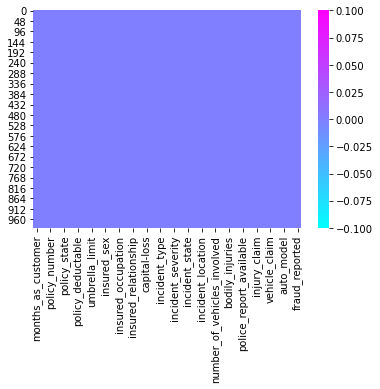

In [17]:
#heatmap for null values
sns.heatmap(df.isnull(),cmap='cool')

No missing value are present

In [18]:
#checking the type of dataset
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

The dataset contains 3 different types of data namely integer datatype, float datatype and object datatype.



In [19]:
#checking the unique values
df.nunique().to_frame('NO. of Unique values')

NO. of Unique values
months_as_customer                            391
age                                            46
policy_number                                1000
policy_bind_date                              951
policy_state                                    3
policy_csl                                      3
policy_deductable                               3
policy_annual_premium                         991
umbrella_limit                                 11
insured_zip                                   995
insured_sex                                     2
insured_education_level                         7
insured_occupation                             14
insured_hobbies                                20
insured_relationship                            6
capital-gains                                 338
capital-loss                                  354
incident_date                                  60
incident_type                                   4
collision_type                                  4
incident_severity                               4
authorities_contacted                           5
incident_state                                  7
incident_city                                   7
incident_location                            1000
incident_hour_of_the_day                       24
number_of_vehicles_involved                     4
property_damage                                 3
bodily_injuries                                 3
witnesses                                       4
police_report_available                         3
total_claim_amount                            763
injury_claim                                  638
property_claim                                626
vehicle_claim                                 726
auto_make                                      14
auto_model                                     39
auto_year                                      21
fraud_reported                                  2

Thesr are the unique values.

# Data Preprocessing

# Feature Selection
We can observe the columns policy_number and incident_location have 1000 unique values which means they have only one value count.So it is not required for prediction and we can drop it.

In [20]:
#Dropping The columns
df.drop('policy_number',axis=1,inplace=True)


In [21]:
df.drop('incident_location',axis=1,inplace=True)

In [22]:
#checking the value counts 
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

194    8
254    7
210    7
101    7
140    7
      ..
312    1
62     1
309    1
308    1
0      1
Name: months_as_customer, Length: 391, dtype: int64


43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
35    32
44    32
36    32
42    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
55    14
25    14
49    14
50    13
53    13
24    10
54    10
61    10
51     9
60     9
56     8
58     8
23     7
21     6
59     5
52     4
62     4
63     2
64     2
20     1
22     1
19     1
Name: age, dtype: int64


28-04-1992    3
01-01-2006    3
05-08-1992    3
08-11-2009    2
04-06-2000    2
             ..
20-11-1991    1
01-08-2010    1
05-08-2006    1
10-02-1997    1
03-08-2009    1
Name: policy_bind_date, Length: 951, dtype: int64


OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


1000    351
500     342
2000    3

By looking at the value counts of each column we can realize that the colujmns umbrella_limit,capital-gains and capital-loss contains more zero values around 79.8%,50.8% and 47.5% respectively. I am keeping the zero values in capital-gains and capital-loss columns as it is. Since Umbrella_limit column has more than 70% of zero values, lets drop it.



In [23]:
#Dropping the columns
df.drop('umbrella_limit',axis=1,inplace=True)

The column insured_zip is the zip code given to each person.If we take look at the value count and unique values of the column insured_zip, it contains 995 unique values that means the 5 entries are repeating. Since it is giving some information about the person,either we can drop this or we can convert its datatype from interger to object for better processing.



In [24]:
#dropping the column
df.drop('insured_zip',axis=1,inplace=True)

# Feature Extraction
The policy_bind_date and incident_date have object data type which should be in datetime datatype.So we will convert this object datatype to datetime and we will extract values from these columns.

In [25]:
# Converting Date columns from object type into datetime data type
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])


In [26]:
df['incident_date']=pd.to_datetime(df['incident_date'])

In [27]:
#again checking the datatype
df.dtypes

months_as_customer                      int64
age                                     int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted                  object
incident_state                         object
incident_city                          object
incident_hour_of_the_day          

Now we have converted object data type into datetime data type.NOw lets extract Dat, Month and Year from both the columns.



In [28]:
# Extracting Day, Month and Year column from policy_bind_date
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_year'] = df['policy_bind_date'].dt.year

# Extracting Day, Month and Year column from incident_date
df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year

Now we have extracted day, month and year columns from both policy_bind_date and incident_date.So we can drop these columns.



In [29]:
# Dropping policy_bind_date and incident_date columns
df.drop('policy_bind_date',axis=1,inplace=True)

In [30]:
df.drop('incident_date',axis=1,inplace=True)

We have dropped the columns policy_bind_date and incident_date as we have extracted the required data from those columns

In [31]:
#checking which column contain'?'
df[df.columns[(df=='?').any()]].nunique()

collision_type             4
property_damage            3
police_report_available    3
dtype: int64

These are the columns which contains "?" sign. Since these columns seems to be categorical so we will replcae "?" values with most frequent occuring values of the respective columns that is their mode values.



In [32]:
# Checking the mode of the above columns
print("The mode of collision_type is:",df['collision_type'].mode())
print("The mode of property_damage is:",df['property_damage'].mode())
print("The mode of police_report_available is:",df['police_report_available'].mode())

The mode of collision_type is: 0    Rear Collision
dtype: object
The mode of property_damage is: 0    ?
dtype: object
The mode of police_report_available is: 0     ?
1    NO
dtype: object


The mode of property_damage and police_report_available is "?", which means the data is almost covered by "?" sign. So will fill them ny the second highest count of the respective column.



In [33]:
# Checking value_count of property_damage column and police_report_available
print("The value count of property_damage:\n",df["property_damage"].value_counts())
print("\n")


The value count of property_damage:
 ?      360
NO     338
YES    302
Name: property_damage, dtype: int64




In [34]:
# Replacing "?" by their mode values
df['collision_type'] = df.collision_type.str.replace('?', df['collision_type'].mode()[0])
df['property_damage'] = df.property_damage.str.replace('?', "NO")
df['police_report_available'] = df.police_report_available.str.replace('?', "NO")

In [35]:
# Checking value count again
print("The value count of collision_type:\n", df["collision_type"].value_counts())
print("\n")
print("The value count of property_damage:\n", df["property_damage"].value_counts())
print("\n")
print("The value count of police_report_available:\n", df["police_report_available"].value_counts())

The value count of collision_type:
 Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64


The value count of property_damage:
 NO     698
YES    302
Name: property_damage, dtype: int64


The value count of police_report_available:
 NO     686
YES    314
Name: police_report_available, dtype: int64


The policy_csl column showing object data type but it contains numerical data, may be it is because of the presence of "/" in that column. So first we will extract two columns csl_per_person and csl_per_accident from policy_csl colums and then will convert their object data type into integer data type.



In [36]:
# Extracting csl_per_person and csl_per_accident from policy_csl column
df['csl_per_person'] = df.policy_csl.str.split('/',expand=True)[0]
df['csl_per_accident'] = df.policy_csl.str.split('/',expand=True)[1]


In [37]:
#cinverting the obh=j in to int
df['csl_per_person']=df['csl_per_person'].astype('int64')
df['csl_per_accident']=df['csl_per_accident'].astype('int64')

In [38]:
# Since we have extracted the data type from policy_csl, lets drop that column
df.drop("policy_csl",axis=1,inplace=True)


In [39]:
# Lets extract age of the vehicle from auto_year by subtracting it from the year 2018
df['Vehicle_Age']=2018-df['auto_year']
df.drop("auto_year",axis=1,inplace=True)


Here we have extracted age of the vehicle on the basis of auto year by assuming the data is collected in the year 2018.



In [40]:
#lets check the unque values again
df.nunique().to_frame('NO.of uniqure values')

NO.of uniqure values
months_as_customer                            391
age                                            46
policy_state                                    3
policy_deductable                               3
policy_annual_premium                         991
insured_sex                                     2
insured_education_level                         7
insured_occupation                             14
insured_hobbies                                20
insured_relationship                            6
capital-gains                                 338
capital-loss                                  354
incident_type                                   4
collision_type                                  3
incident_severity                               4
authorities_contacted                           5
incident_state                                  7
incident_city                                   7
incident_hour_of_the_day                       24
number_of_vehicles_involved                     4
property_damage                                 2
bodily_injuries                                 3
witnesses                                       4
police_report_available                         2
total_claim_amount                            763
injury_claim                                  638
property_claim                                626
vehicle_claim                                 726
auto_make                                      14
auto_model                                     39
fraud_reported                                  2
policy_bind_day                                31
policy_bind_month                              12
policy_bind_year                               26
incident_day                                   22
incident_month                                 12
incident_year                                   1
csl_per_person                                  3
csl_per_accident                                3
Vehicle_Age                                    21

These are the unique values present in each column after feature extraction and selection. Here incident_year column has one unique value through out the column also it is not impacting the predictions so we can drop this column.



In [41]:
# Dropping incident_Year column
df.drop("incident_year",axis=1,inplace=True)

In [42]:
#lets check again top 5 rows
df.head()

months_as_customer  age policy_state  policy_deductable  \
0                 328   48           OH               1000   
1                 228   42           IN               2000   
2                 134   29           OH               2000   
3                 256   41           IL               2000   
4                 228   44           IL               1000   

   policy_annual_premium insured_sex insured_education_level  \
0                1406.91        MALE                      MD   
1                1197.22        MALE                      MD   
2                1413.14      FEMALE                     PhD   
3                1415.74      FEMALE                     PhD   
4                1583.91        MALE               Associate   

  insured_occupation insured_hobbies insured_relationship  ...  auto_model  \
0       craft-repair        sleeping              husband  ...         92x   
1  machine-op-inspct         reading       other-relative  ...        E400   
2              sales     board-games            own-child  ...         RAM   
3       armed-forces     board-games            unmarried  ...       Tahoe   
4              sales     board-games            unmarried  ...         RSX   

   fraud_reported policy_bind_day policy_bind_month policy_bind_year  \
0               Y              17                10             2014   
1               Y              27                 6             2006   
2               N               9                 6             2000   
3               Y              25                 5             1990   
4               N               6                 6             2014   

  incident_day incident_month csl_per_person  csl_per_accident  Vehicle_Age  
0           25              1            250               500           14  
1           21              1            250               500           11  
2           22              2            100               300           11  
3            1             10            250               500            4  
4           17              2            500              1000            9  

[5 rows x 39 columns]

In [43]:
# Checking for categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns are:\n",categorical_col)
print("\n")

# Checking for numerical columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("Numerical columns are:\n",numerical_col)
print("\n")

Categorical columns are:
 ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


Numerical columns are:
 ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'csl_per_person', 'csl_per_accident', 'Vehicle_Age']




In [44]:
#value count for target 
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

From the value counts we can notice that the data is not balanced. So we can use ovesampling method to balance the data before building the models.



# Description of data

In [45]:
df.describe()

months_as_customer          age  policy_deductable  \
count         1000.000000  1000.000000        1000.000000   
mean           203.954000    38.948000        1136.000000   
std            115.113174     9.140287         611.864673   
min              0.000000    19.000000         500.000000   
25%            115.750000    32.000000         500.000000   
50%            199.500000    38.000000        1000.000000   
75%            276.250000    44.000000        2000.000000   
max            479.000000    64.000000        2000.000000   

       policy_annual_premium  capital-gains   capital-loss  \
count            1000.000000    1000.000000    1000.000000   
mean             1256.406150   25126.100000  -26793.700000   
std               244.167395   27872.187708   28104.096686   
min               433.330000       0.000000 -111100.000000   
25%              1089.607500       0.000000  -51500.000000   
50%              1257.200000       0.000000  -23250.000000   
75%              1415.695000   51025.000000       0.000000   
max              2047.590000  100500.000000       0.000000   

       incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  \
count               1000.000000                   1000.00000      1000.000000   
mean                  11.644000                      1.83900         0.992000   
std                    6.951373                      1.01888         0.820127   
min                    0.000000                      1.00000         0.000000   
25%                    6.000000                      1.00000         0.000000   
50%                   12.000000                      1.00000         1.000000   
75%                   17.000000                      3.00000         2.000000   
max                   23.000000                      4.00000         2.000000   

         witnesses  ...  property_claim  vehicle_claim  policy_bind_day  \
count  1000.000000  ...     1000.000000    1000.000000      1000.000000   
mean      1.487000  ...     7399.570000   37928.950000        15.448000   
std       1.111335  ...     4824.726179   18886.252893         8.850176   
min       0.000000  ...        0.000000      70.000000         1.000000   
25%       1.000000  ...     4445.000000   30292.500000         8.000000   
50%       1.000000  ...     6750.000000   42100.000000        16.000000   
75%       2.000000  ...    10885.000000   50822.500000        23.000000   
max       3.000000  ...    23670.000000   79560.000000        31.000000   

       policy_bind_month  policy_bind_year  incident_day  incident_month  \
count        1000.000000       1000.000000    1000.00000     1000.000000   
mean            6.559000       2001.604000      13.08400        3.407000   
std             3.391758          7.360391      10.44318        3.276291   
min             1.000000       1990.000000       1.00000        1.000000   
25%             4.000000       1995.000000       2.00000        1.000000   
50%             7.000000       2002.000000      15.00000        2.000000   
75%             9.000000       2008.000000      22.00000        5.000000   
max            12.000000       2015.000000      31.00000       12.000000   

       csl_per_person  csl_per_accident  Vehicle_Age  
count     1000.000000       1000.000000  1000.000000  
mean       272.650000        580.200000    12.897000  
std        161.603196        287.420547     6.015861  
min        100.000000        300.000000     3.000000  
25%        100.000000        300.000000     8.000000  
50%        250.000000        500.000000    13.000000  
75%        500.000000       1000.000000    18.000000  
max        500.000000       1000.000000    23.000000  

[8 rows x 22 columns]

From the above description we can observe the following things.

.Here the counts of all the columns are equal which means there are no missing values in the dataset.

.In some of the columns like policy_deductable, capital-gains, injury_claim etc we can observe the mean value is greater than the median(50%) which means the data in those columns are skewed to right.

.And in some of the columns like total_claim_amount, vehicle_claim...etc we can observe the median is greater than the mean which means the data in the columns are skewed to left.

.And some of the columns have equal mean and median that means the data symmetric and is normally distributed and no skewness present.

.There is a huge difference in 75% and max it shows that huge outliers present in the columns.

# Data Visualization

Univariate Analysis

N    753
Y    247
Name: fraud_reported, dtype: int64


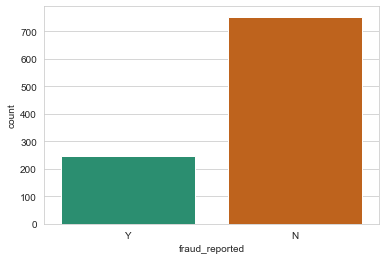

In [46]:
# Visualizing how many insurance claims is fraudulent
print(df['fraud_reported'].value_counts())
sns.set_style('whitegrid')
sns.countplot(df['fraud_reported'],palette='Dark2')
plt.show()

N    753
Y    247
Name: fraud_reported, dtype: int64


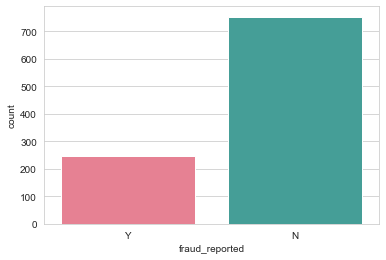

In [47]:
# Visualizing how many insurance claims is fraudulent
print(df['fraud_reported'].value_counts())
sns.countplot(df['fraud_reported'],palette='husl')
plt.show()

N    753
Y    247
Name: fraud_reported, dtype: int64


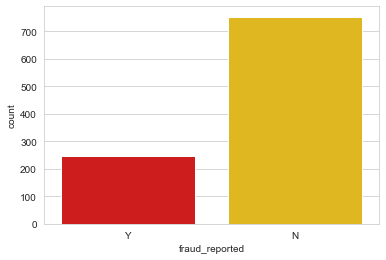

In [48]:
# Visualizing how many insurance claims is fraudulent
print(df['fraud_reported'].value_counts())
sns.countplot(df['fraud_reported'],palette='hot')
plt.show()

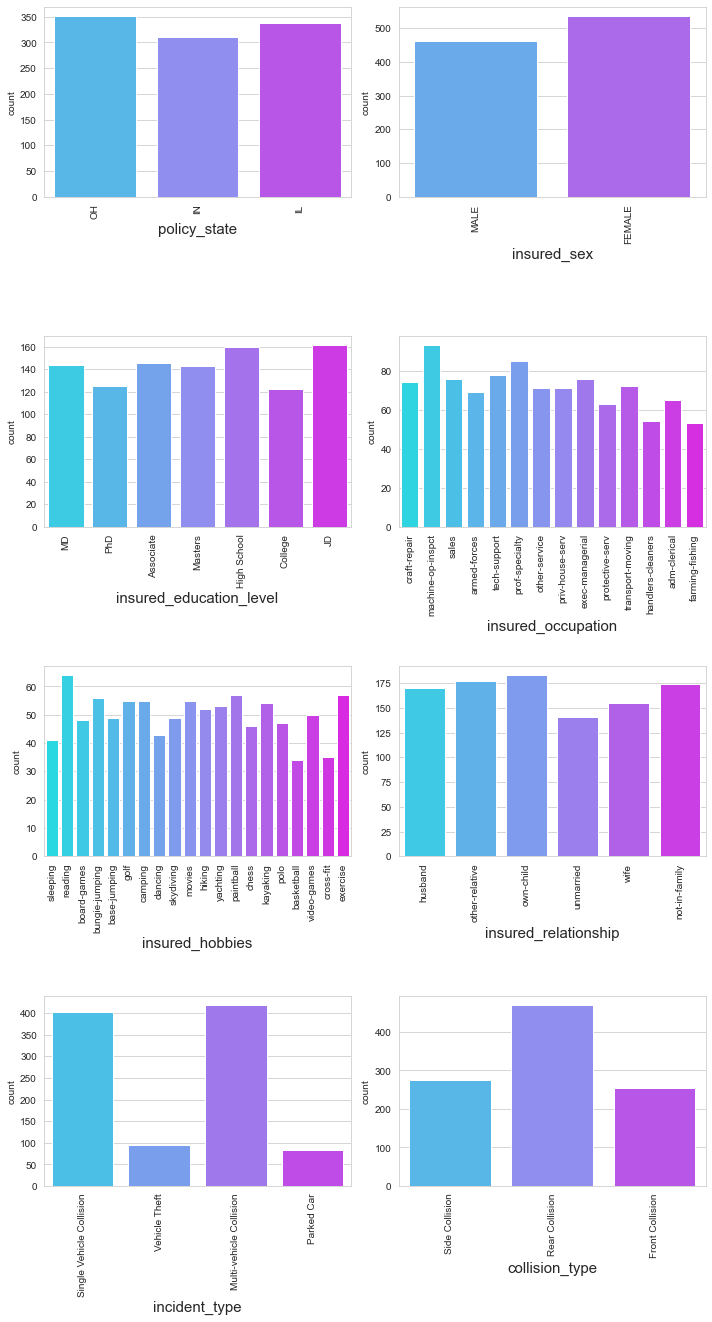

In [49]:
plt.figure(figsize=(10,35))
plotnumber=1
for col in categorical_col:
    if plotnumber<=8:
        ax = plt.subplot(8,2,plotnumber)
        sns.countplot(df[col],palette="cool")
        plt.xticks(rotation=90)
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

# Distribution of skewness


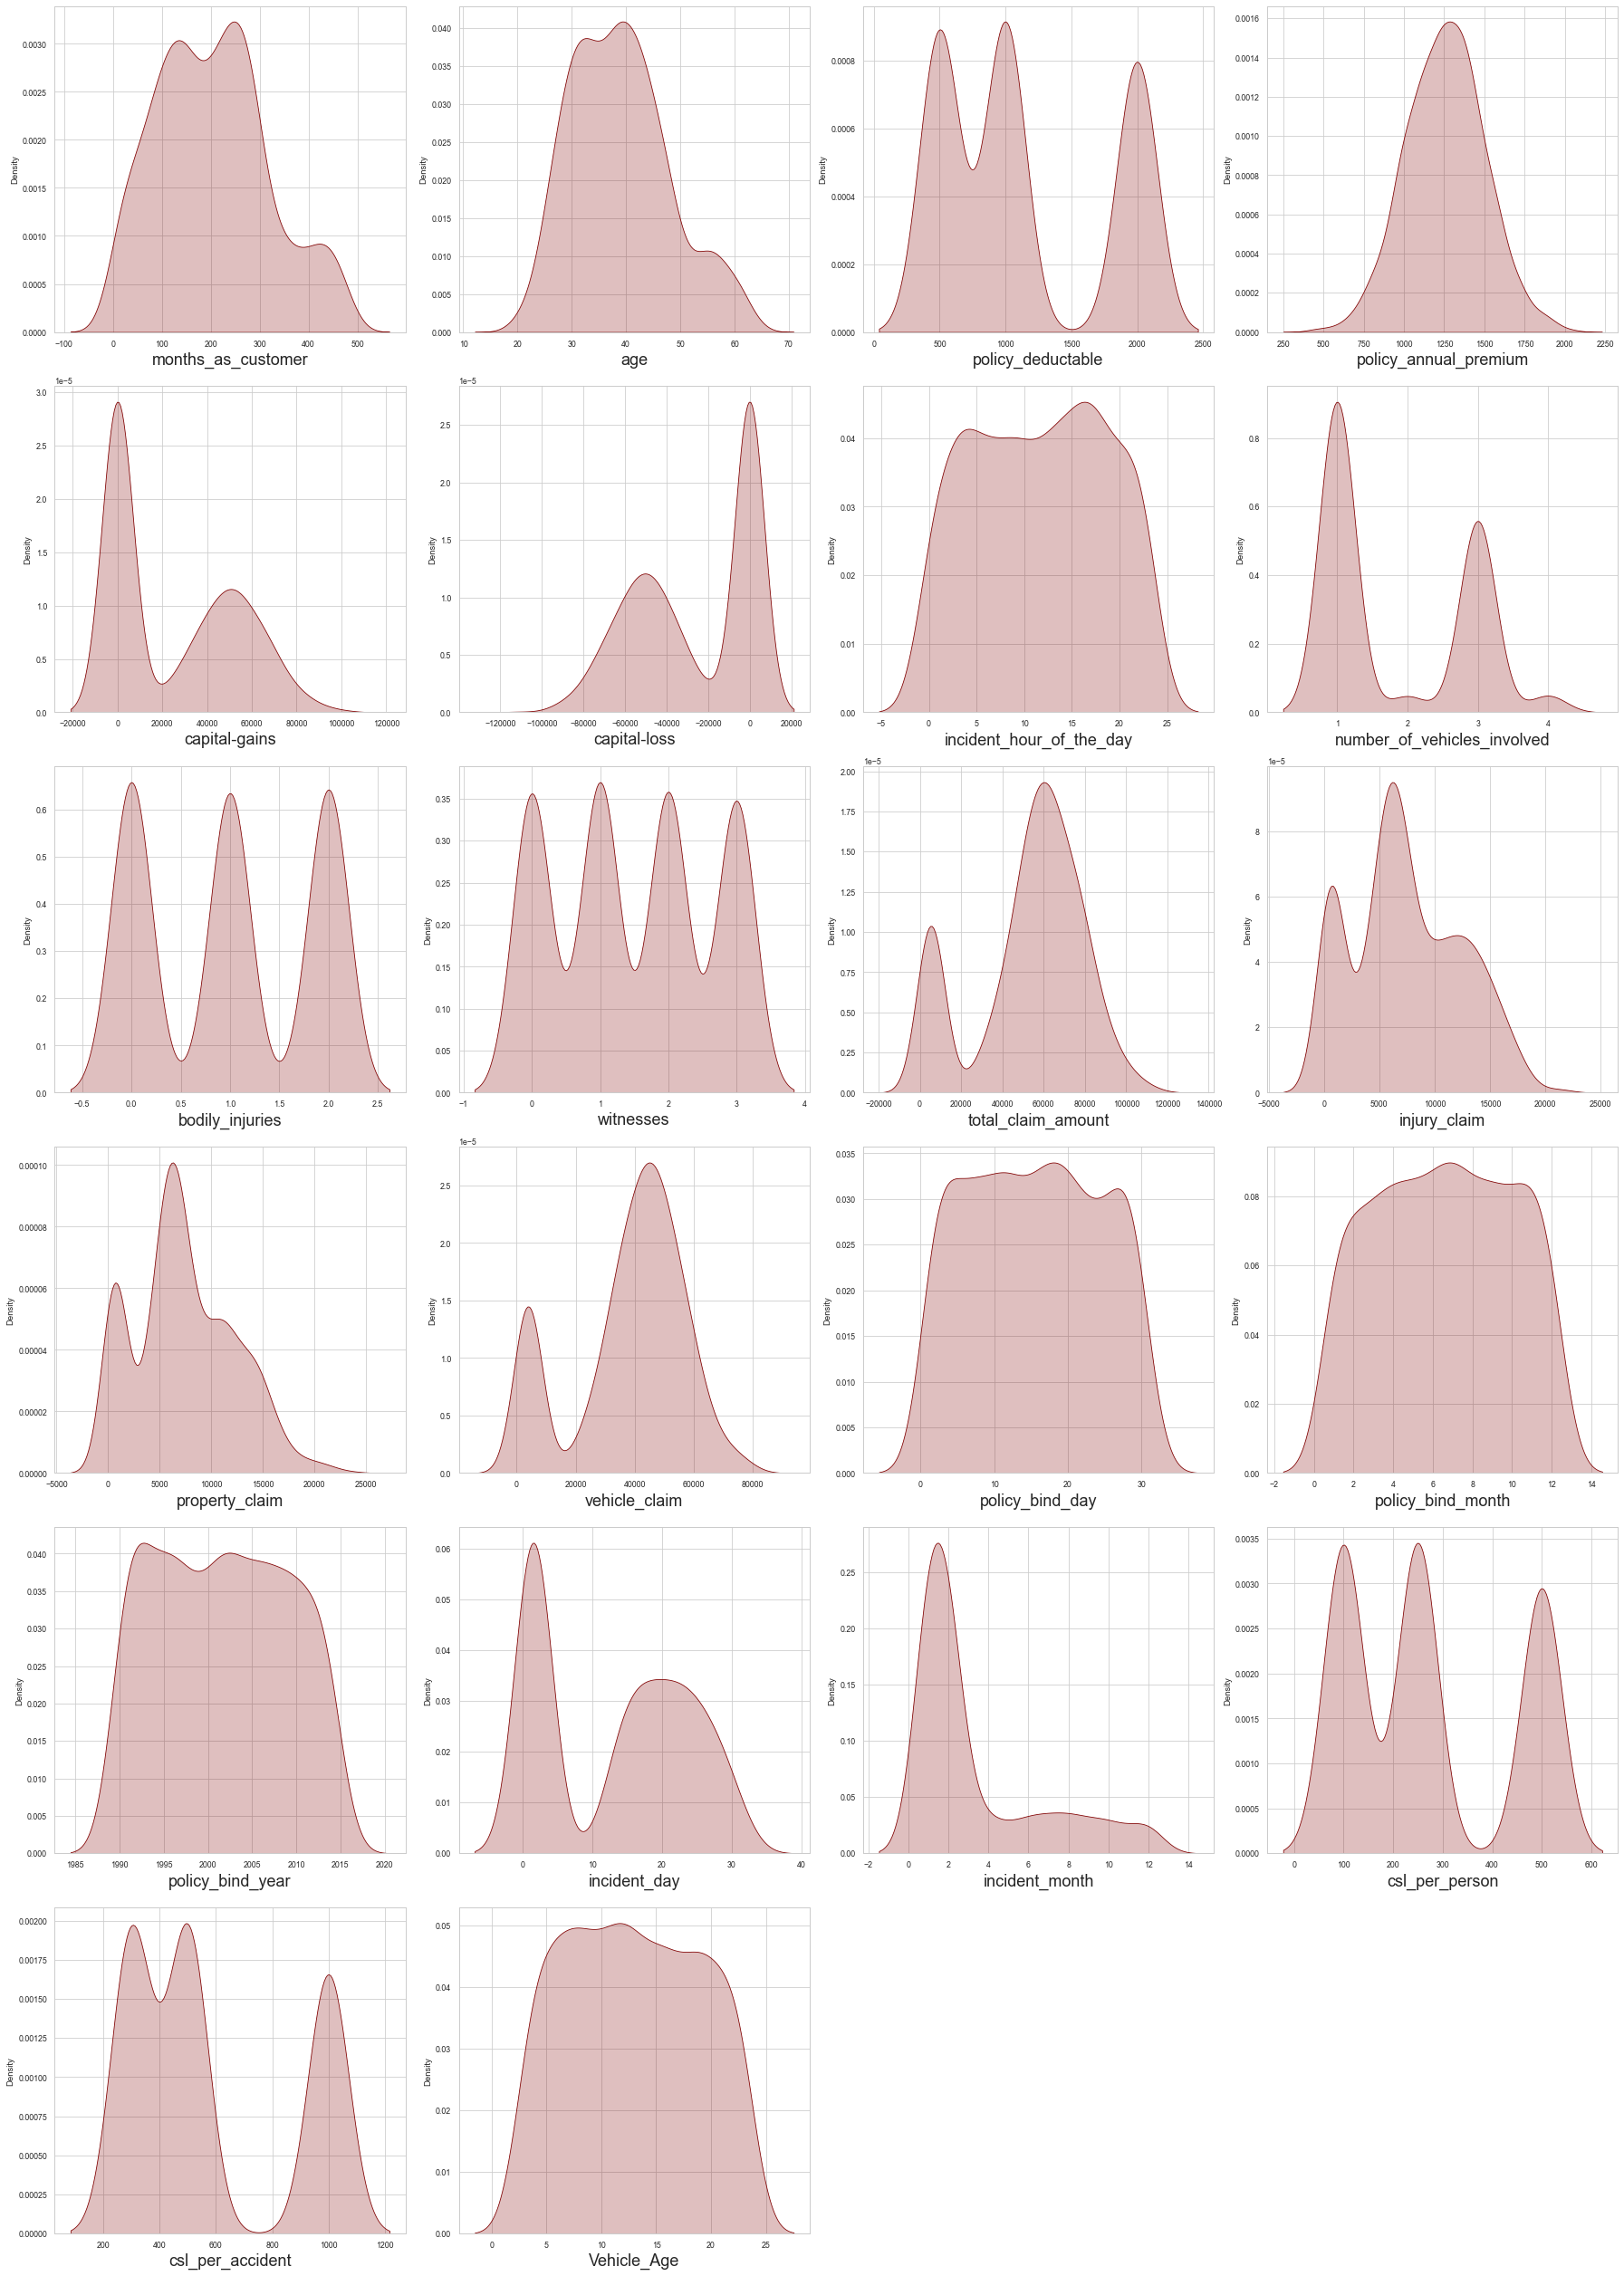

In [140]:
#checking hoe the data has been distributed


plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=23:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color='maroon',hist=False,kde_kws={'shade':True})
        plt.xlabel(column,fontsize=18)
    plotnumber+=1
plt.tight_layout()

Above are the distribution plots for all the numerical columns. From the distplots we can observe the following:

.The data is normally distributed in most of the columns.

.Some of the columns like capital-gains and incident_months have mean value greater than the median, hence it is skewed to the right.

.The data in the column capital loss is skewed to left.

# Bivariate Analysis

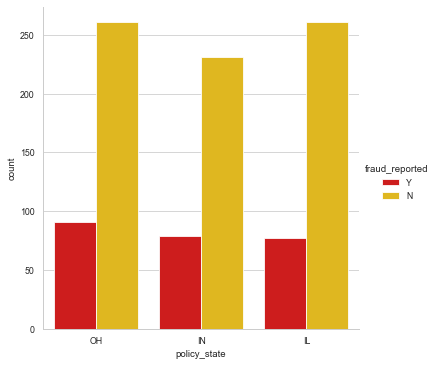

In [143]:
# Comparing policy_state and fraud_reported
sns.factorplot('policy_state',kind='count',data=df,hue='fraud_reported',palette='hot')
plt.show()

Fraud report is high in "OH" policy_state.



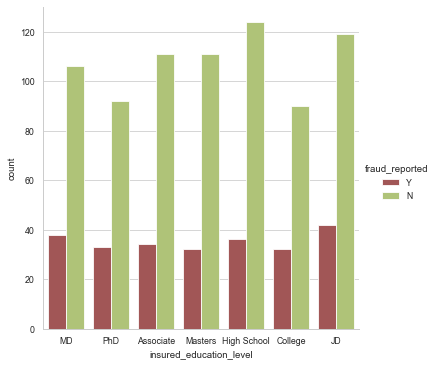

In [144]:
# Comparing insured_education_level and fraud_reported
sns.factorplot('insured_education_level',kind='count',data=df,hue='fraud_reported',palette='tab20b_r')
plt.show()

The fraudulent level is very less for the people who have high scool education and the people who have completed thier "JD" education have high fruad report.The people who have high insured education are facing insurance fruadulent compared to the people with less insured education level.



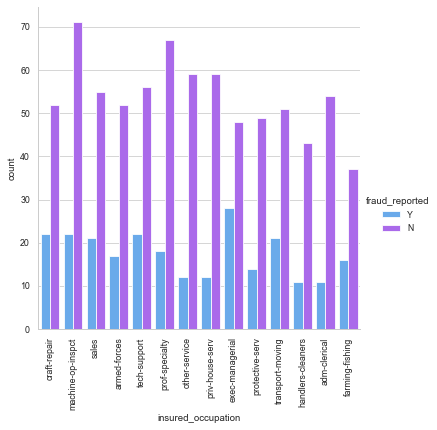

In [146]:
# Comparing insured_occupation and fraud_reported
sns.factorplot('insured_occupation',kind='count',data=df,hue='fraud_reported',palette="cool")
plt.xticks(rotation=90)
plt.show()

The people who are in the position exec-managerials have high fraud reports compared to others.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'sleeping'),
  Text(1, 0, 'reading'),
  Text(2, 0, 'board-games'),
  Text(3, 0, 'bungie-jumping'),
  Text(4, 0, 'base-jumping'),
  Text(5, 0, 'golf'),
  Text(6, 0, 'camping'),
  Text(7, 0, 'dancing'),
  Text(8, 0, 'skydiving'),
  Text(9, 0, 'movies'),
  Text(10, 0, 'hiking'),
  Text(11, 0, 'yachting'),
  Text(12, 0, 'paintball'),
  Text(13, 0, 'chess'),
  Text(14, 0, 'kayaking'),
  Text(15, 0, 'polo'),
  Text(16, 0, 'basketball'),
  Text(17, 0, 'video-games'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'exercise')])

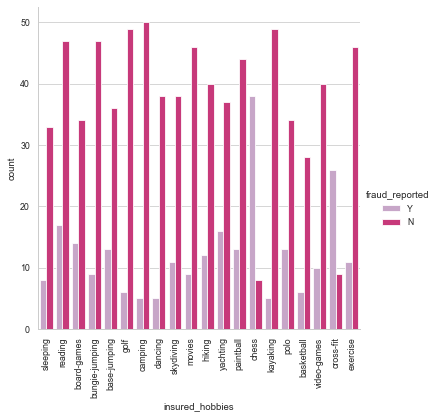

In [151]:
#comparing the insured_hobbies and fraude_report
sns.factorplot('insured_hobbies',kind='count',data=df,hue='fraud_reported',palette='PuRd')
plt.xticks(rotation=90)

The fraud report is high for the people who have the hobby of playing chess and cross fit.



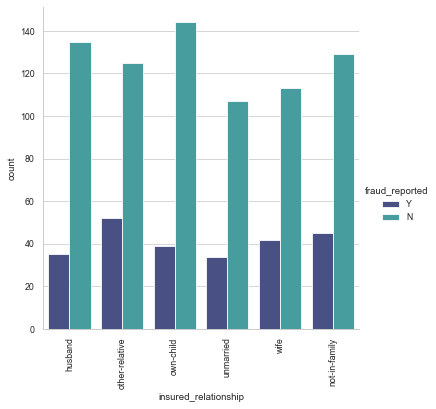

In [152]:
# Comparing insured_hobbies and fraud_reported
sns.factorplot('insured_relationship',kind='count',data=df,hue='fraud_reported',palette='mako')
plt.xticks(rotation=90)
plt.show()

The fraud report is high for the customers who have other relative and it is less for unmarried people.



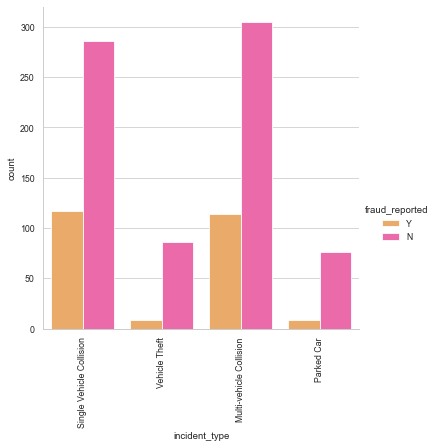

In [154]:
# Comparing incident_type and fraud_reported
sns.factorplot('incident_type',kind='count',data=df,hue='fraud_reported',palette="spring_r")
plt.xticks(rotation=90)
plt.show()

In Multivehicle collision and single vehicle collision, the fraud report is very high compared to others.



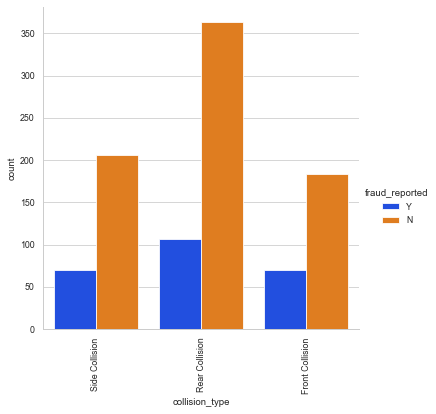

In [155]:
#Comparing collision_type and fraud_reported
sns.factorplot('collision_type',kind='count',data=df,hue='fraud_reported',palette="bright")
plt.xticks(rotation=90)
plt.show()

The fraud level is high in the collision type Rear Collision and other two collision type have average reports.



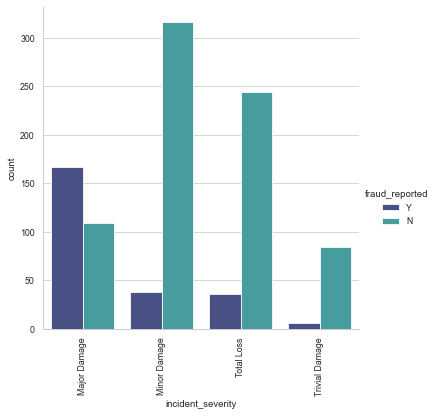

In [156]:
# Comparing incident_severity and fraud_reported
sns.factorplot('incident_severity',kind='count',data=df,hue='fraud_reported',palette="mako")
plt.xticks(rotation=90)
plt.show()

The fraud report is high in Major damage incident severity and for Trivial Damage the report is less compared to others.



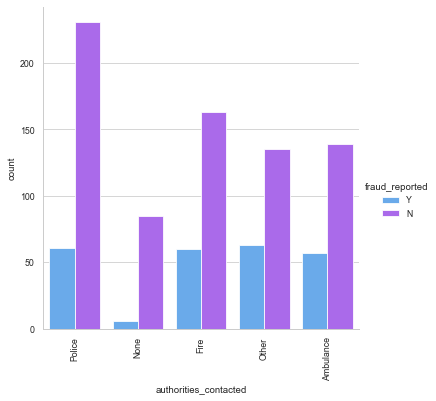

In [161]:
# Comparing authorities_contacted and fraud_reported
sns.factorplot('authorities_contacted',kind='count',data=df,hue='fraud_reported',palette="cool")
plt.xticks(rotation=90)
plt.show()

The police contacted cases are very high and the fraud report is in equal for all the authorities except None.



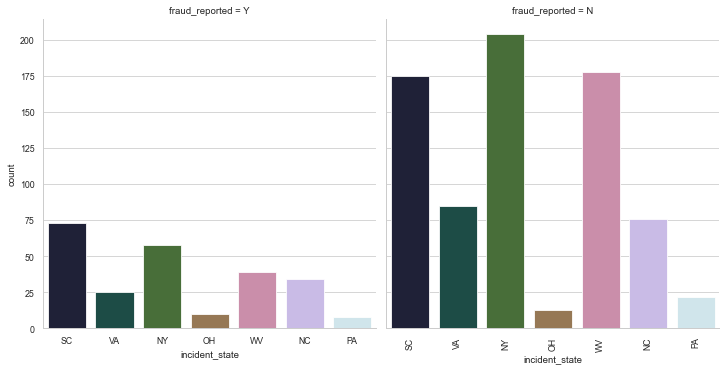

In [163]:
#Comparing incident_state and fraud_reported
sns.factorplot('incident_state',kind='count',data=df,col='fraud_reported',palette="cubehelix")
plt.xticks(rotation=90)
plt.show()

The state SC has high fraud reports compared to other states.



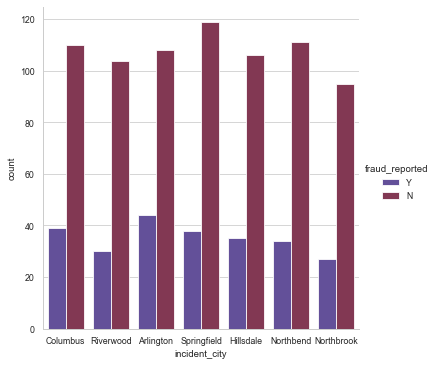

In [164]:
#comparing the incident city and fraud_reported

sns.catplot('incident_city',kind='count',data=df,hue='fraud_reported',palette='twilight')

The cities Riverwood and Northbrook have very less fraud reports compared to others.



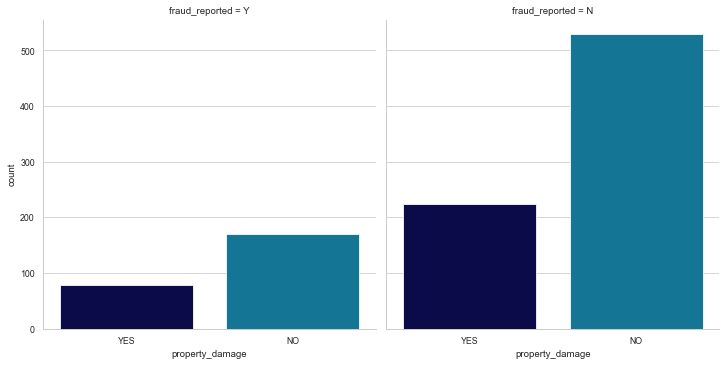

In [165]:
#comparing the property_damage and fraud_report
sns.factorplot('property_damage',kind='count',data=df,col='fraud_reported',palette="ocean")
plt.show()

The customers who do not have any property damage case they have high fraud reports.



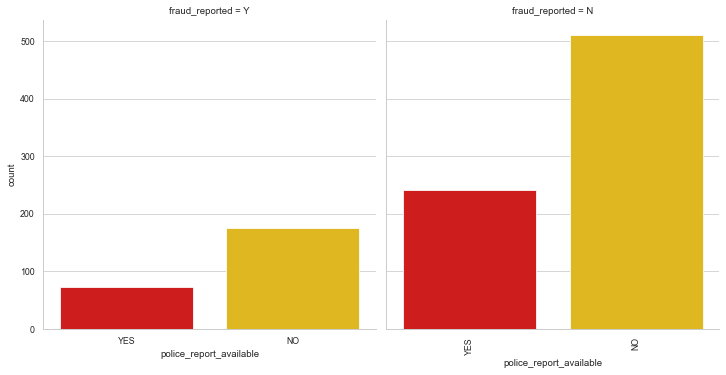

In [167]:
# Comparing police_report_available and fraud_reported
sns.factorplot('police_report_available',kind='count',data=df,col='fraud_reported',palette="hot")
plt.xticks(rotation=90)
plt.show()

If there is no police report available then the fraud report is very high.



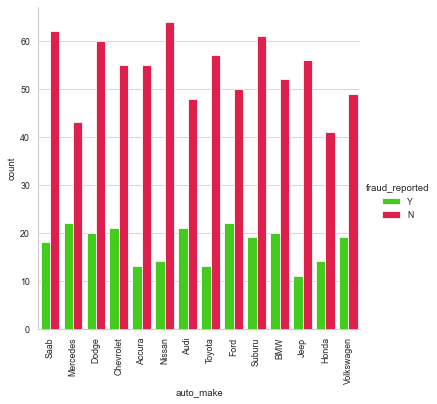

In [169]:
# Comparing auto_make and fraud_reported
sns.catplot('auto_make',kind='count',data=df,hue='fraud_reported',palette="prism")
plt.xticks(rotation=90)
plt.show()

In all the auto make cases the fraud report is almost same



<AxesSubplot:title={'center':'Comparison between months_as_customer and total_claim_amount'}, xlabel='months_as_customer', ylabel='total_claim_amount'>

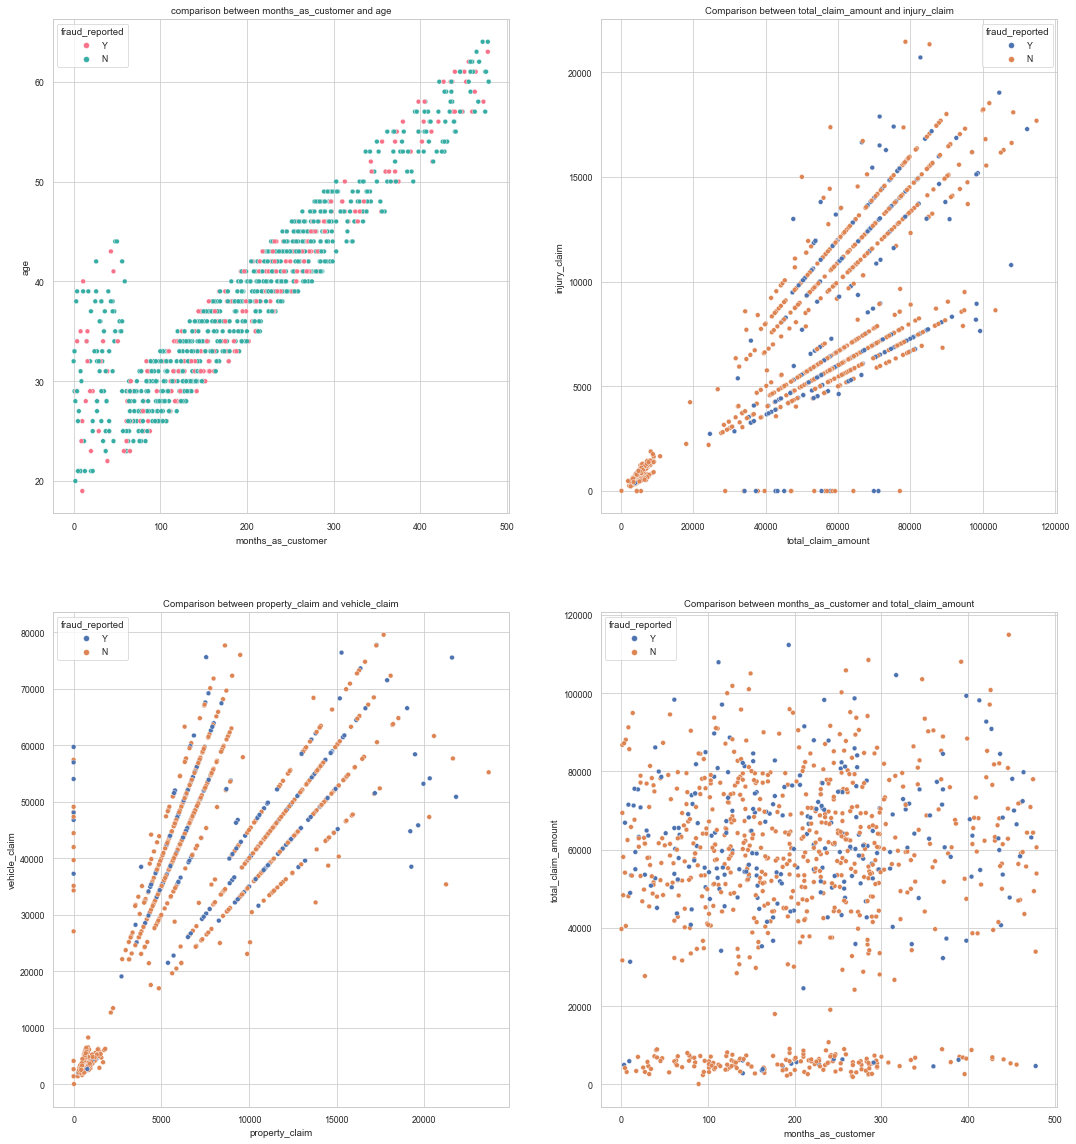

In [176]:
#comparison between two variables
plt.figure(figsize=(18,20))
plt.subplot(2,2,1)
plt.title('comparison between months_as_customer and age')
sns.scatterplot(df['months_as_customer'],df['age'],hue=df['fraud_reported'],palette='husl')

plt.subplot(2,2,2)
plt.title("Comparison between total_claim_amount and injury_claim")
sns.scatterplot(df['total_claim_amount'],df['injury_claim'],hue=df['fraud_reported'])

plt.subplot(2,2,3)
plt.title("Comparison between property_claim and vehicle_claim")
sns.scatterplot(df['property_claim'],df['vehicle_claim'],hue=df['fraud_reported'])

plt.subplot(2,2,4)
plt.title("Comparison between months_as_customer and total_claim_amount")
sns.scatterplot(df['months_as_customer'],df['total_claim_amount'],hue=df['fraud_reported'])

From the above sctterplot we can observe the following things:

.There is a positive linerar relation between age and months_as_customer column. As age increases the month_as_customers also increases, also the fraud reported is very less in this case.

.In the second graph we can observe the positive linear relation, as total claim amount increases, injury claim is also increases.

.Third plot is also same as second one that is as the property claim increses, vehicle claim is also increases.

.In the fourth plot we can observe the data is scattered and there is no much relation between the features.

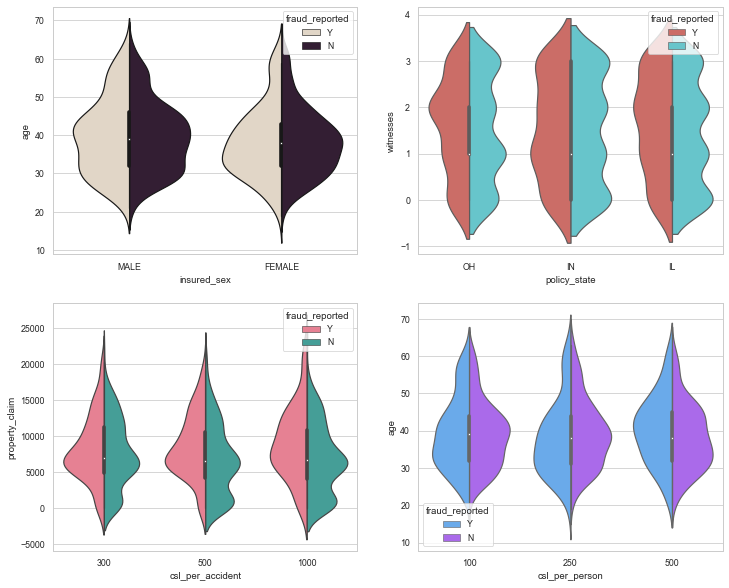

In [179]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Comparing insured_sex and age
sns.violinplot(x='insured_sex',y='age',ax=axes[0,0],data=df,palette="ch:.25",hue="fraud_reported",split=True)

# Comparing policy_state and witnesses
sns.violinplot(x='policy_state',y='witnesses',ax=axes[0,1],data=df,hue="fraud_reported",split=True,palette="hls")

# Comparing csl_per_accident and property_claim
sns.violinplot(x='csl_per_accident',y='property_claim',ax=axes[1,0],data=df,hue="fraud_reported",split=True,palette="husl")

# Comparing csl_per_person and age
sns.violinplot(x='csl_per_person',y='age',ax=axes[1,1],data=df,hue="fraud_reported",split=True,palette="cool")
plt.show()

.The fraud report is high for both the males-females having age between 30-45.

.The people who own the policy state "IN" have high fraud report.

.The person who has csl per accidemt insurance by claimimg property in the range 5000-15000 have the fraud report.

.The csl_per_person with age 30-45 are facing the fraudulent reports.

# Multivariate Analysis


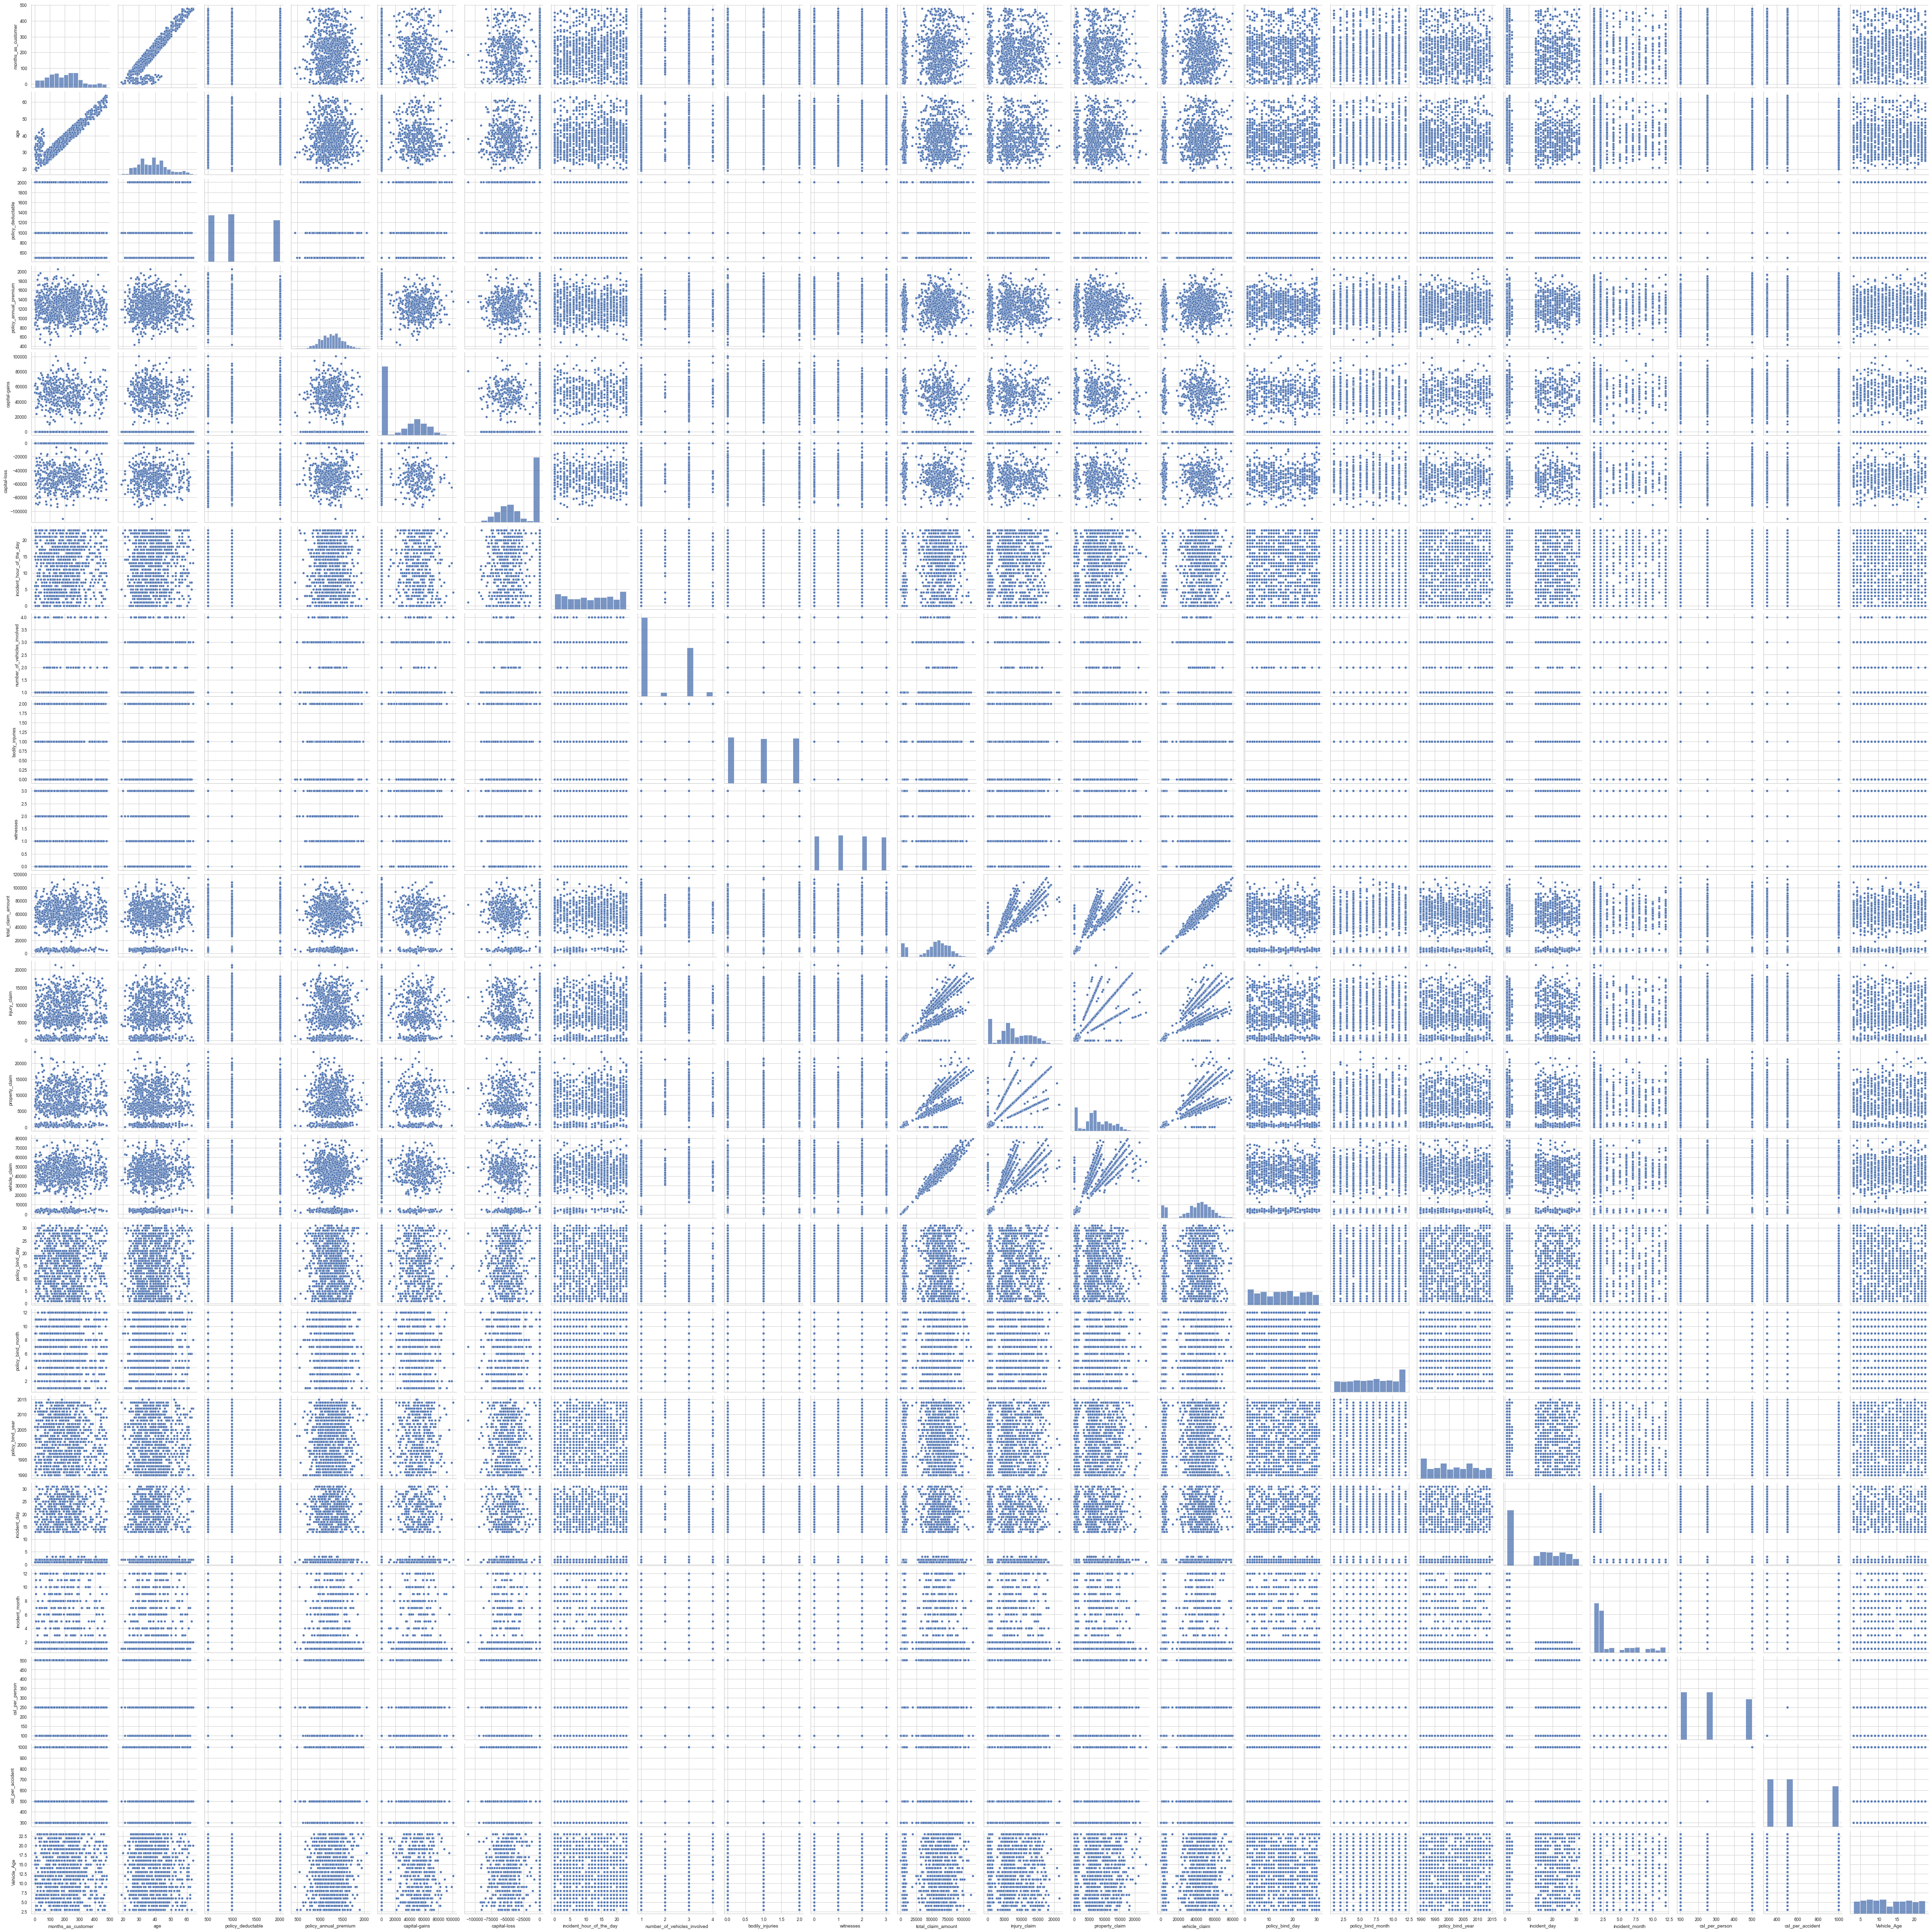

In [181]:
sns.pairplot(df,palette='cool')


.The pairplot gives the pairwise relation between the features on the basis of the target "fraud_reported". On the diagonal we can notice the distribution plots.

.From the pair plot we can observe some of the features have strong correlation with each other.

.We can also find some outliers presentin the data, we will remove them using either Zscore.

# Identifying the Outliers


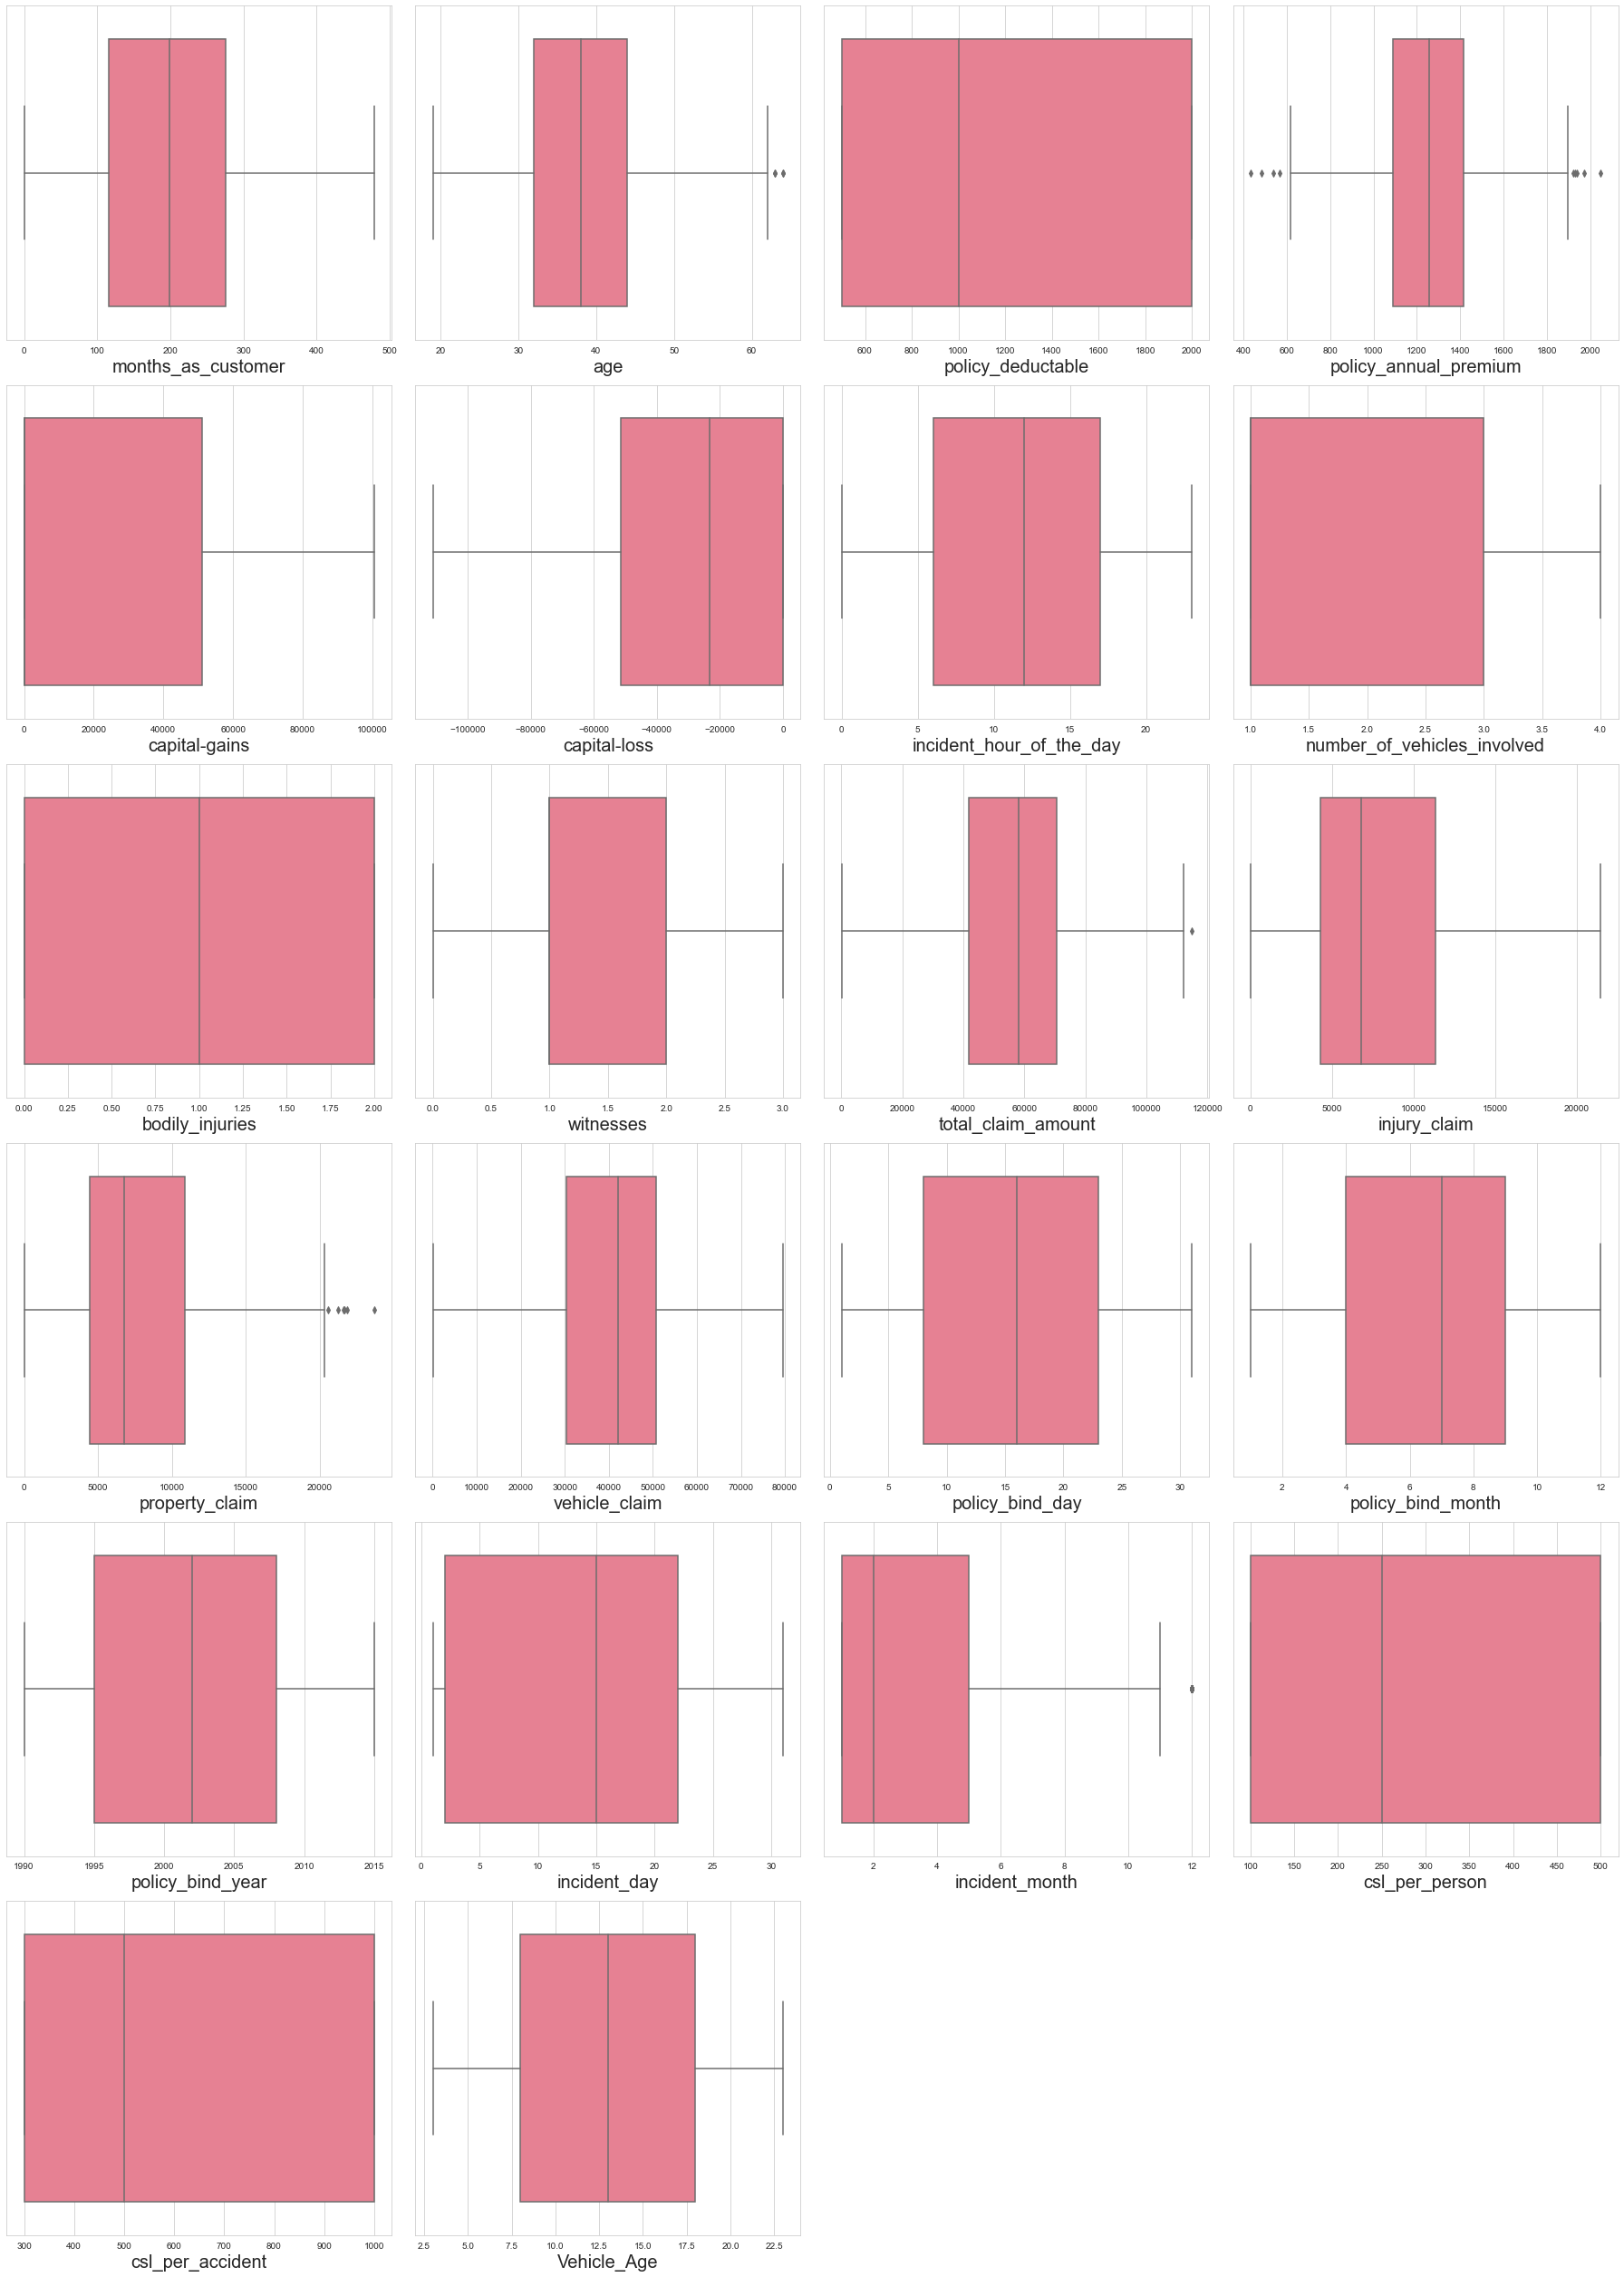

In [50]:
# Lets check the outliers by plotting boxplot
plt.figure(figsize=(25,35),facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber<=23:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(df[col],palette="husl")
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

These are the numerical columns which contains outliers. Lets remove outliers in these columns using either Zscore method 

# Removing Outliers

Zscore method


In [51]:
from scipy.stats import zscore
features = df[["age","policy_annual_premium","total_claim_amount","property_claim","incident_month"]]
z=np.abs(zscore(features))
z

array([[0.99083647, 0.61670461, 0.71425742, 1.16550497, 0.73503976],
       [0.33407345, 0.24252118, 1.80731185, 1.37269599, 0.73503976],
       [1.08891308, 0.64223266, 0.68636176, 0.73607206, 0.42966387],
       ...,
       [0.54161057, 0.52073881, 0.55850675, 0.0208261 , 0.73503976],
       [2.52328351, 0.41186558, 0.21910974, 0.45197603, 0.42966387],
       [2.3043625 , 2.00870981, 1.80769081, 1.34366428, 0.42966387]])

Now we have removed the outliers

In [52]:
#Creating the dataframe
new_df=df[(z<3).all(axis=1)]
new_df

months_as_customer  age policy_state  policy_deductable  \
0                   328   48           OH               1000   
1                   228   42           IN               2000   
2                   134   29           OH               2000   
3                   256   41           IL               2000   
4                   228   44           IL               1000   
..                  ...  ...          ...                ...   
995                   3   38           OH               1000   
996                 285   41           IL               1000   
997                 130   34           OH                500   
998                 458   62           IL               2000   
999                 456   60           OH               1000   

     policy_annual_premium insured_sex insured_education_level  \
0                  1406.91        MALE                      MD   
1                  1197.22        MALE                      MD   
2                  1413.14      FEMALE                     PhD   
3                  1415.74      FEMALE                     PhD   
4                  1583.91        MALE               Associate   
..                     ...         ...                     ...   
995                1310.80      FEMALE                 Masters   
996                1436.79      FEMALE                     PhD   
997                1383.49      FEMALE                 Masters   
998                1356.92        MALE               Associate   
999                 766.19      FEMALE               Associate   

    insured_occupation insured_hobbies insured_relationship  ...  auto_model  \
0         craft-repair        sleeping              husband  ...         92x   
1    machine-op-inspct         reading       other-relative  ...        E400   
2                sales     board-games            own-child  ...         RAM   
3         armed-forces     board-games            unmarried  ...       Tahoe   
4                sales     board-games            unmarried  ...         RSX   
..                 ...             ...                  ...  ...         ...   
995       craft-repair       paintball            unmarried  ...      Accord   
996     prof-specialty        sleeping                 wife  ...      Passat   
997       armed-forces  bungie-jumping       other-relative  ...     Impreza   
998  handlers-cleaners    base-jumping                 wife  ...          A5   
999              sales        kayaking              husband  ...        E400   

     fraud_reported policy_bind_day policy_bind_month policy_bind_year  \
0                 Y              17                10             2014   
1                 Y              27                 6             2006   
2                 N               9                 6             2000   
3                 Y              25                 5             1990   
4                 N               6                 6             2014   
..              ...             ...               ...              ...   
995               N              16                 7             1991   
996               N               1                 5             2014   
997               N              17                 2             2003   
998               N              18                11             2011   
999               N              11                11             1996   

    incident_day incident_month csl_per_person  csl_per_accident  Vehicle_Age  
0             25              1            250               500           14  
1             21              1            250               500           11  
2             22              2            100               300           11  
3              1             10            250               500            4  
4             17              2            500              1000            9  
..           ...            ...            ...               ...          ...  
995           22              2  

In [54]:
#shape after removing the outliers
print(df.shape)
print(new_df.shape)

(1000, 39)
(996, 39)


In [55]:
#checking the dataloss
loss=(1000-996)/1000*100
loss

0.4

# correlation


In [57]:
new_df.corr()

months_as_customer       age  policy_deductable  \
months_as_customer                     1.000000  0.922092           0.023512   
age                                    0.922092  1.000000           0.026772   
policy_deductable                      0.023512  0.026772           1.000000   
policy_annual_premium                 -0.003378  0.005890          -0.008445   
capital-gains                          0.007601 -0.006333           0.035950   
capital-loss                           0.020771  0.008192          -0.024018   
incident_hour_of_the_day               0.068962  0.085509           0.059733   
number_of_vehicles_involved            0.013609  0.021140           0.051317   
bodily_injuries                       -0.011126 -0.017461          -0.023384   
witnesses                              0.063530  0.056658           0.069433   
total_claim_amount                     0.064193  0.069989           0.024621   
injury_claim                           0.066416  0.075480           0.040337   
property_claim                         0.041157  0.064230           0.069537   
vehicle_claim                          0.062062  0.061949           0.006292   
policy_bind_day                        0.054175  0.054465           0.011204   
policy_bind_month                      0.004955  0.015874          -0.051368   
policy_bind_year                      -0.046010 -0.035505          -0.048465   
incident_day                          -0.013502 -0.008174          -0.018867   
incident_month                         0.022949  0.021773          -0.007687   
csl_per_person                        -0.022063 -0.012844           0.006634   
csl_per_accident                      -0.021145 -0.012967           0.006888   
Vehicle_Age                           -0.001287 -0.003268          -0.027497   

                             policy_annual_premium  capital-gains  \
months_as_customer                       -0.003378       0.007601   
age                                       0.005890      -0.006333   
policy_deductable                        -0.008445       0.035950   
policy_annual_premium                     1.000000      -0.009757   
capital-gains                            -0.009757       1.000000   
capital-loss                              0.029835      -0.049528   
incident_hour_of_the_day                 -0.003001      -0.018367   
number_of_vehicles_involved              -0.044711       0.062047   
bodily_injuries                           0.025323       0.053608   
witnesses                                 0.006365      -0.017785   
total_claim_amount                        0.003550       0.015824   
injury_claim                             -0.024031       0.027397   
property_claim                           -0.007964      -0.003947   
vehicle_claim                             0.013198       0.016032   
policy_bind_day                          -0.030886       0.008550   
policy_bind_month                        -0.028452      -0.012221   
policy_bind_year                          0.001650       0.041789   
incident_day                              0.016400       0.015736   
incident_month                            0.011257       0.031664   
csl_per_person                            0.028569       0.003241   
csl_per_accident                          0.026591       0.002504   
Vehicle_Age                               0.040439      -0.031282   

                             capital-loss  incident_hour_of_the_day  \
months_as_customer               0.020771                  0.068962   
age                              0.008192                  0.085509   
policy_deductable               -0.024018                  0.059733   
policy_annual_premium            0.029835                 -0.003001   
capital-gains                   -0.049528                 -0.018367   
capital-loss                     1.000000                 -0.028729   
incident_hour_of_the_day        -0.028729                  1.000000   
number_of_vehicles_involved     

skewness are present

# Removing Skewness using yeo-johnson method

In [48]:
# Removing skewness using yeo-johnson  method to get better prediction
skew = ["total_claim_amount","vehicle_claim","incident_month","csl_per_accident"]

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [49]:
new_df[skew] = scaler.fit_transform(new_df[skew].values)
new_df[skew].head()

total_claim_amount  vehicle_claim  incident_month  csl_per_accident
0            0.717556       0.754553       -1.101370          0.052612
1           -1.777785      -1.787353       -1.101370          0.052612
2           -0.716483      -0.820820       -0.026479         -1.174021
3            0.392931       0.678427        1.553647          0.052612
4           -1.730555      -1.740710       -0.026479          1.313327

In [50]:
# Checking skewness after using yeo-johnson ethod
new_df[skew].skew()

total_claim_amount   -0.508953
vehicle_claim        -0.521354
incident_month        0.305741
csl_per_accident      0.110964
dtype: float64

# Encoding the data

In [51]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(lr.fit_transform)


In [52]:
new_df[categorical_col].head()

policy_state  insured_sex  insured_education_level  insured_occupation  \
0             2            1                        4                   2   
1             1            1                        4                   6   
2             2            0                        6                  11   
3             0            0                        6                   1   
4             0            1                        0                  11   

   insured_hobbies  insured_relationship  incident_type  collision_type  \
0               17                     0              2               2   
1               15                     2              3               1   
2                2                     3              0               1   
3                2                     4              2               0   
4                2                     4              3               1   

   incident_severity  authorities_contacted  incident_state  incident_city  \
0                  0                      4               4              1   
1                  1                      4               5              5   
2                  1                      4               1              1   
3                  0                      4               2              0   
4                  1                      2               1              0   

   property_damage  police_report_available  auto_make  auto_model  \
0                1                        1         10           1   
1                0                        0          8          12   
2                0                        0          4          30   
3                0                        0          3          34   
4                0                        0          0          31   

   fraud_reported  
0               1  
1               1  
2               0  
3               1  
4               0

Now our data is encoded

# Correlation

In [53]:
new_df.corr()

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922092      0.000118   
age                                    0.922092  1.000000     -0.015182   
policy_state                           0.000118 -0.015182      1.000000   
policy_deductable                      0.023512  0.026772      0.010740   
policy_annual_premium                 -0.003378  0.005890      0.014475   
insured_sex                            0.059002  0.072900     -0.019294   
insured_education_level               -0.000848  0.001485     -0.032551   
insured_occupation                     0.005365  0.014030     -0.031016   
insured_hobbies                       -0.092575 -0.080587     -0.040215   
insured_relationship                   0.071097  0.075940     -0.018855   
capital-gains                          0.007601 -0.006333      0.072552   
capital-loss                           0.020771  0.008192     -0.032268   
incident_type                         -0.017202 -0.025979      0.031769   
collision_type                        -0.072479 -0.075892      0.050953   
incident_severity                     -0.061932 -0.060361     -0.026728   
authorities_contacted                  0.011406  0.016000     -0.017738   
incident_state                         0.006906  0.007053      0.009195   
incident_city                         -0.001837 -0.004009     -0.004475   
incident_hour_of_the_day               0.068962  0.085509      0.026464   
number_of_vehicles_involved            0.013609  0.021140     -0.043447   
property_damage                        0.002663 -0.005795     -0.009334   
bodily_injuries                       -0.011126 -0.017461      0.008992   
witnesses                              0.063530  0.056658      0.024809   
police_report_available               -0.018760 -0.018493      0.065957   
total_claim_amount                     0.064662  0.070582     -0.008788   
injury_claim                           0.066416  0.075480     -0.046398   
property_claim                         0.041157  0.064230      0.002678   
vehicle_claim                          0.062392  0.062165     -0.000472   
auto_make                              0.049222  0.032105      0.015848   
auto_model                             0.002908  0.016258     -0.024513   
fraud_reported                         0.020966  0.012408      0.028864   
policy_bind_day                        0.054175  0.054465      0.001030   
policy_bind_month                      0.004955  0.015874      0.071527   
policy_bind_year                      -0.046010 -0.035505     -0.005709   
incident_day                          -0.013502 -0.008174      0.013370   
incident_month                         0.019029  0.016685      0.026233   
csl_per_person                        -0.022063 -0.012844     -0.005866   
csl_per_accident                      -0.022928 -0.012459     -0.000653   
Vehicle_Age                           -0.001287 -0.003268     -0.002323   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.023512              -0.003378   
age                                   0.026772               0.005890   
policy_state                          0.010740               0.014475   
policy_deductable                     1.000000              -0.008445   
policy_annual_premium                -0.008445               1.000000   
insured_sex                          -0.011671               0.041830   
insured_education_level               0.014571              -0.021475   
insured_occupation                   -0.050024               0.030963   
insured_hobbies                       0.005134              -0.014376   
insured_relationship                 -0.021763               0.006474   
capital-gains                         0.035950              -0.009757   
capital-loss                         -0.024018               0.029835   
incident_type                        -0.038696               0.049336   
collis

We can see the correlation between dependent and independent variables after encoding the categorical data.



<AxesSubplot:>

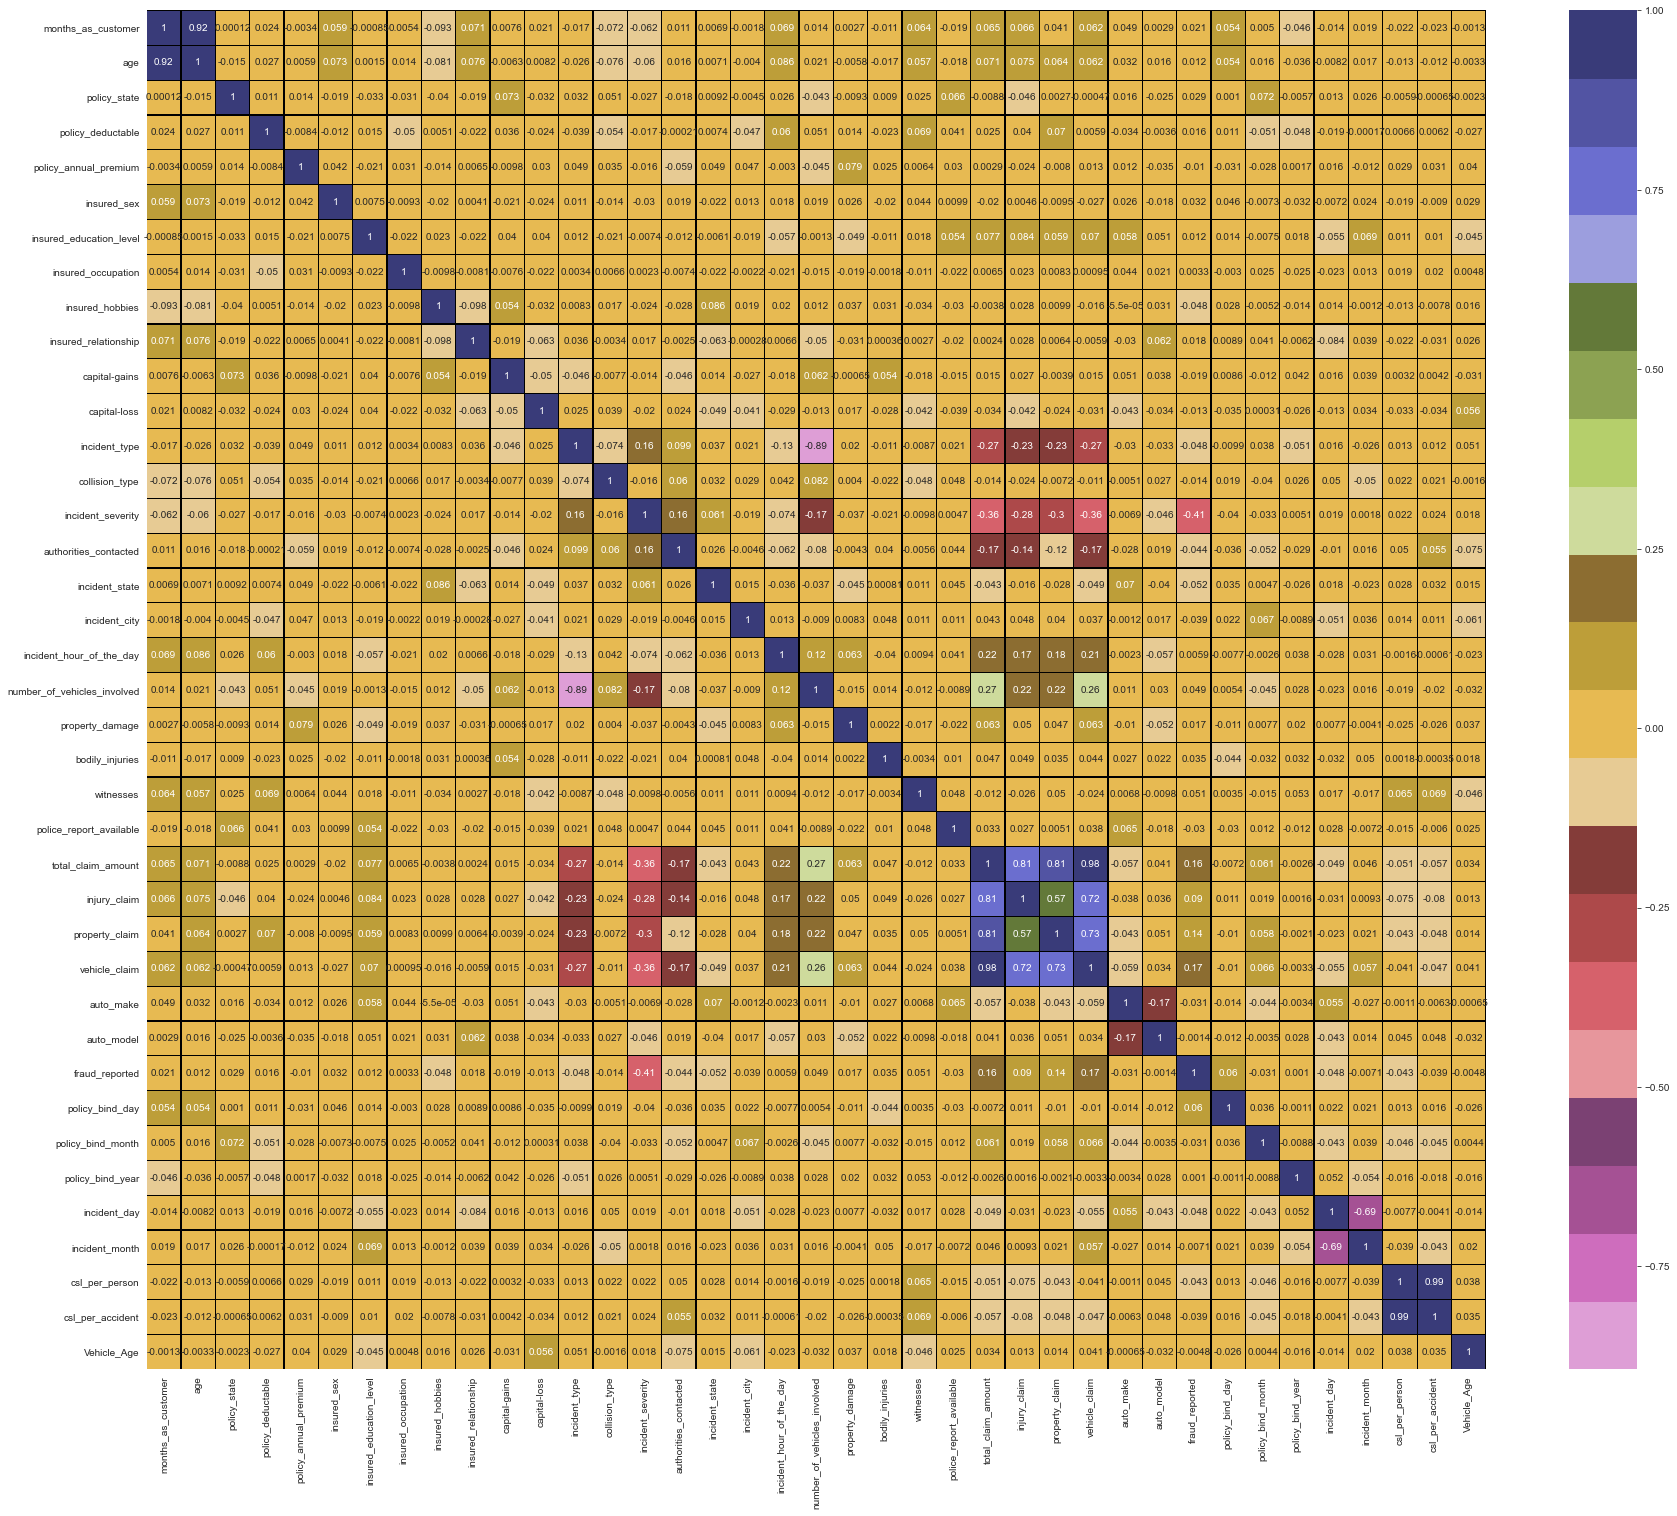

In [54]:
#Heatmap for correlation
plt.figure(figsize=(30,25))
sns.heatmap(new_df.corr(),linecolor='black',linewidths=0.2,annot=True,cmap='tab20b_r')

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other.

This heat mapcontains both positive and negative correlation.

.There is very less correlation between the target and the label.

.We can observe the most of the columns are highly correlated with each other which leads to the multicollinearity problem.

.We will check the VIF value to overcome with this multicollinearity problem.

# Separating features and label


In [55]:
x=new_df.drop('fraud_reported',axis=1)
y=new_df['fraud_reported']

In [56]:
print(x.shape)
print(y.shape)

(996, 38)
(996,)


# Feature Scaling

In [57]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=pd.DataFrame(ss.fit_transform(x),columns=x.columns)
x.head()

months_as_customer       age  policy_state  policy_deductable  \
0            1.074671  0.987190      1.186130          -0.224722   
1            0.204846  0.330455     -0.018137           1.409024   
2           -0.612790 -1.092470      1.186130           1.409024   
3            0.448397  0.221000     -1.222403           1.409024   
4            0.204846  0.549367     -1.222403          -0.224722   

   policy_annual_premium  insured_sex  insured_education_level  \
0               0.621371     1.075102                 0.531088   
1              -0.251375     1.075102                 0.531088   
2               0.647301    -0.930144                 1.557206   
3               0.658123    -0.930144                 1.557206   
4               1.358059     1.075102                -1.521148   

   insured_occupation  insured_hobbies  insured_relationship  ...  auto_make  \
0           -1.162296         1.280299             -1.436113  ...   0.857248   
1           -0.166257         0.928186             -0.246617  ...   0.360986   
2            1.078792        -1.360550              0.348131  ...  -0.631538   
3           -1.411305        -1.360550              0.942878  ...  -0.879669   
4            1.078792        -1.360550              0.942878  ...  -1.624063   

   auto_model  policy_bind_day  policy_bind_month  policy_bind_year  \
0   -1.644810         0.177487           1.013751          1.686176   
1   -0.657437         1.309223          -0.166145          0.599693   
2    0.958263        -0.727901          -0.166145         -0.215170   
3    1.317308         1.082875          -0.461119         -1.573274   
4    1.048024        -1.067422          -0.166145          1.686176   

   incident_day  incident_month  csl_per_person  csl_per_accident  Vehicle_Age  
0      1.139807       -1.101370       -0.137684          0.052612     0.182338  
1      0.756374       -1.101370       -0.137684          0.052612    -0.316587  
2      0.852233       -0.026479       -1.066352         -1.174021    -0.316587  
3     -1.160788        1.553647       -0.137684          0.052612    -1.480744  
4      0.372942       -0.026479        1.410096          1.313327    -0.649203  

[5 rows x 38 columns]

Now our data is scaled

# Checking the Multicolinearity

In [58]:
#Finding the variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"] = x.columns
vif['VIF Values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns)) ]

In [59]:
vif

Features    VIF Values
0            months_as_customer      6.851319
1                           age      6.855557
2                  policy_state      1.039410
3             policy_deductable      1.045656
4         policy_annual_premium      1.037450
5                   insured_sex      1.037410
6       insured_education_level      1.047043
7            insured_occupation      1.017493
8               insured_hobbies      1.052669
9          insured_relationship      1.052965
10                capital-gains      1.040529
11                 capital-loss      1.042461
12                incident_type      5.151758
13               collision_type      1.047678
14            incident_severity      1.240895
15        authorities_contacted      1.107639
16               incident_state      1.045277
17                incident_city      1.030872
18     incident_hour_of_the_day      1.102947
19  number_of_vehicles_involved      5.124218
20              property_damage      1.030337
21              bodily_injuries      1.028589
22                    witnesses      1.044300
23      police_report_available      1.044785
24           total_claim_amount  43288.328057
25                 injury_claim   1595.753768
26               property_claim   1549.162785
27                vehicle_claim  21553.456819
28                    auto_make      1.078702
29                   auto_model      1.066796
30              policy_bind_day      1.025460
31            policy_bind_month      1.039616
32             policy_bind_year      1.028406
33                 incident_day      1.969181
34               incident_month      1.979298
35               csl_per_person     52.779677
36             csl_per_accident     52.918708
37                  Vehicle_Age      1.040959

We can see some columns have vif values above 10 that meand they are causing multicolinerity problem. Lets drop the features having high VIF value.



In [60]:
#Dropping the colums
x.drop(['total_claim_amount'],axis=1,inplace=True)

In [61]:
#Again checking VIF value to confirm whether the multicollinearity still exists or not
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) 
                     for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

vif_Features                     Features
0       6.849523           months_as_customer
1       6.855452                          age
2       1.039378                 policy_state
3       1.044129            policy_deductable
4       1.036722        policy_annual_premium
5       1.034404                  insured_sex
6       1.046991      insured_education_level
7       1.016776           insured_occupation
8       1.050855              insured_hobbies
9       1.052941         insured_relationship
10      1.040477                capital-gains
11      1.042289                 capital-loss
12      5.141590                incident_type
13      1.047497               collision_type
14      1.195570            incident_severity
15      1.085702        authorities_contacted
16      1.040880               incident_state
17      1.029837                incident_city
18      1.096945     incident_hour_of_the_day
19      5.112157  number_of_vehicles_involved
20      1.030127              property_damage
21      1.026279              bodily_injuries
22      1.044259                    witnesses
23      1.043381      police_report_available
24      2.176141                 injury_claim
25      2.253675               property_claim
26      3.359532                vehicle_claim
27      1.076002                    auto_make
28      1.066163                   auto_model
29      1.025362              policy_bind_day
30      1.039588            policy_bind_month
31      1.028184             policy_bind_year
32      1.968018                 incident_day
33      1.973791               incident_month
34     52.768853               csl_per_person
35     52.900590             csl_per_accident
36      1.040311                  Vehicle_Age

Since we have high vif value in csl_per_person and csl_per_accident. Lets remove csl_per_accident column as it has high vif value greater than csl_per_person.



In [62]:
# Dropping csl_per_accident column
x.drop("csl_per_accident",axis=1,inplace=True)


In [63]:
# Again checking VIF value to confirm whether the multicollinearity still exists or not
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) 
                     for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

vif_Features                     Features
0       6.847077           months_as_customer
1       6.852905                          age
2       1.038072                 policy_state
3       1.043977            policy_deductable
4       1.036330        policy_annual_premium
5       1.029258                  insured_sex
6       1.046990      insured_education_level
7       1.016674           insured_occupation
8       1.049392              insured_hobbies
9       1.048658         insured_relationship
10      1.040356                capital-gains
11      1.042211                 capital-loss
12      5.138442                incident_type
13      1.047212               collision_type
14      1.195551            incident_severity
15      1.084547        authorities_contacted
16      1.040581               incident_state
17      1.029318                incident_city
18      1.096675     incident_hour_of_the_day
19      5.110588  number_of_vehicles_involved
20      1.030105              property_damage
21      1.026183              bodily_injuries
22      1.043608                    witnesses
23      1.038953      police_report_available
24      2.175649                 injury_claim
25      2.253397               property_claim
26      3.359149                vehicle_claim
27      1.073774                    auto_make
28      1.065523                   auto_model
29      1.024664              policy_bind_day
30      1.039515            policy_bind_month
31      1.028024             policy_bind_year
32      1.967723                 incident_day
33      1.971186               incident_month
34      1.032569               csl_per_person
35      1.040165                  Vehicle_Age

Now  the multicolineraity problem has been resolved.

# Oversampling

In [64]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [65]:
#checking the value count
y.value_counts()

0    750
1    750
Name: fraud_reported, dtype: int64

Now our data is balanced

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

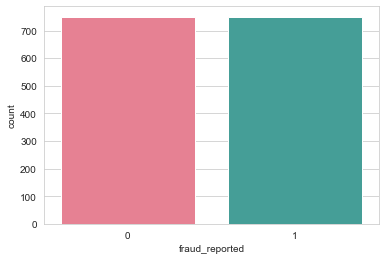

In [66]:
# Visualizing the data after oversampling
sns.countplot(y,palette="husl")

We can visualize the balanced data too.



# Modeling

Finding the best random state

In [68]:
maxAcc=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
print("Best accuracy is ",maxAcc,"at random state",maxRs)


Best accuracy is  0.92 at random state 177


# Creating train test split


In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)

# LogisticRegression

In [70]:
# Checking accuracy for LogisticRegression
lr= LogisticRegression()
lr.fit(x_train,y_train)
pred =lr.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7622222222222222
[[169  58]
 [ 49 174]]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       227
           1       0.75      0.78      0.76       223

    accuracy                           0.76       450
   macro avg       0.76      0.76      0.76       450
weighted avg       0.76      0.76      0.76       450



# RandomForestClassifier


In [71]:
# Checking accuracy for RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9022222222222223
[[210  17]
 [ 27 196]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       227
           1       0.92      0.88      0.90       223

    accuracy                           0.90       450
   macro avg       0.90      0.90      0.90       450
weighted avg       0.90      0.90      0.90       450



# DecisionTreeClassifier

In [72]:
# Checking accuracy for DecisionTree classifier
dc= DecisionTreeClassifier()
dc.fit(x_train,y_train)
pred = dc.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8466666666666667
[[192  35]
 [ 34 189]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       227
           1       0.84      0.85      0.85       223

    accuracy                           0.85       450
   macro avg       0.85      0.85      0.85       450
weighted avg       0.85      0.85      0.85       450



# Support Vector Machine Classifier


In [75]:
# Checking accuracy for SVC
svc= SVC()
svc.fit(x_train,y_train)
pred = svc.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8844444444444445
[[201  26]
 [ 26 197]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       227
           1       0.88      0.88      0.88       223

    accuracy                           0.88       450
   macro avg       0.88      0.88      0.88       450
weighted avg       0.88      0.88      0.88       450



# GradientBoostingClassifier

In [76]:
# Checking accuracy for GradientBoosting classifier
gb= GradientBoostingClassifier()
gb.fit(x_train,y_train)
pred = gb.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9177777777777778
[[212  15]
 [ 22 201]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       227
           1       0.93      0.90      0.92       223

    accuracy                           0.92       450
   macro avg       0.92      0.92      0.92       450
weighted avg       0.92      0.92      0.92       450



# ExtraTreesClassifier

In [77]:
# Checking accuracy for Extratree classifier
et= ExtraTreesClassifier()
et.fit(x_train,y_train)
pred = et.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9288888888888889
[[211  16]
 [ 16 207]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       227
           1       0.93      0.93      0.93       223

    accuracy                           0.93       450
   macro avg       0.93      0.93      0.93       450
weighted avg       0.93      0.93      0.93       450



# Cross Validation Score


In [81]:
# Checking cross valiodation score for LogisticRegression
from sklearn.model_selection import cross_val_score
print('cross validation score',cross_val_score(lr,x,y,cv=5).mean())

cross validation score 0.7266666666666668


In [82]:
# Checking cross valiodation score for RandomForest

print('cross validation score',cross_val_score(rf,x,y,cv=5).mean())

cross validation score 0.8800000000000001


In [83]:
# Checking cross valiodation score for DecisionTree

print('cross validation score',cross_val_score(dc,x,y,cv=5).mean())

cross validation score 0.8306666666666667


In [84]:
# Checking cross valiodation score for GradientBoost

print('cross validation score',cross_val_score(gb,x,y,cv=5).mean())

cross validation score 0.8746666666666666


In [85]:
# Checking cross valiodation score for svc

print('cross validation score',cross_val_score(svc,x,y,cv=5).mean())

cross validation score 0.8786666666666667


In [86]:
# Checking cross valiodation score for ExtraTreeclassifier

print('cross validation score',cross_val_score(et,x,y,cv=5).mean())

cross validation score 0.9146666666666666


Extra Trees Classifier model have highest accuracy i.e. 92.88% with 91.46% cross validation score which is good and the difference is too less.

# Hyperparameter Tuning


In [87]:
# Extra Trees Classifier
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':['gini','entrophy'],
             'max_features':['auto','sqrt','log2'],
             'max_depth':[0,10,20],
             'n_jobs':[-2,-1,1],
             'n_estimators':[50,100,200,300]}

In [88]:
gcv=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [89]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entrophy'],
                         'max_depth': [0, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1]})

In [90]:
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 200,
 'n_jobs': -1}

In [98]:
Final_model = ExtraTreesClassifier(criterion='gini',max_features='log2',max_depth=20,n_estimators=200,n_jobs=-1)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

93.33333333333333


After tuning the model we are getting 93.33% accuracy.



# Plotting ROC and compare AUC for all the models used

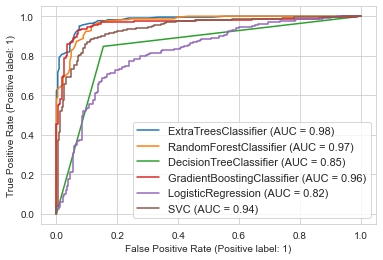

In [101]:
#plotting for all the model 
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(et,x_test,y_test)     # ax_=Axes with confusion matrix
plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)
plot_roc_curve(dc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(gb, x_test, y_test, ax=disp.ax_)
plot_roc_curve(lr, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

Here we can see the Area under curve for each model used here.



# Plotting ROC and compare AUC for best model

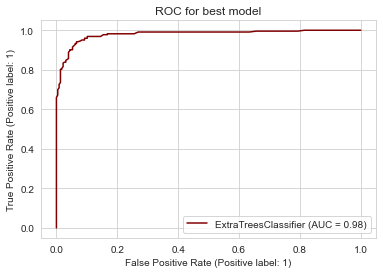

In [102]:
# Lets check the AUC for best model
plot_roc_curve(Final_model,x_test,y_test,color='maroon')
plt.title("ROC for best model")
plt.show()

Here we have plotted the ROC curve for the final model and the AUC value for the best model is 98%.



# Saving the model


In [103]:
#saving the model
joblib.dump(Final_model,'Insurance_claims_Fraud_Detection.pkl')

['Insurance_claims_Fraud_Detection.pkl']

# Predicting the saved model


In [104]:
# Lets load the saved model and get the predictions
model = joblib.load("Insurance_claims_Fraud_Detection.pkl")

# Prediction
prediction = model.predict(x_test)
prediction

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,

In [105]:
a = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] = prediction
df['Original'] = a
df

Predicted  Original
0            0         0
1            1         1
2            0         0
3            1         1
4            1         0
..         ...       ...
445          0         1
446          1         1
447          0         0
448          1         1
449          0         0

[450 rows x 2 columns]

# Conclusion:
.In this dataset, we were asked to predict if an insurance claim made by customer is fraud or not making 'fraud_reported' as our target column.

.We analyzed the dataset thoroughly and then we performed EDA to understand the effect of features on our target label.

.We noted down all the observations that we made from the data visualization of the feature and target columns.

.We found the type of people who are doing fraud, the level of education they have, whether they have children or not and many other things.

.There are imbalanced data in our datset which we balanced using SMOTE technique.

.We have performed all the steps of data science life cycle in this project i.e., data pre-processing, data cleaning, Feature Engineering, Feature selection, Feature Transformation and then Model Building.

.We performed model buildling using many models and we found that Extratreeclassifier was giving good matrix so we selected this model and performed hyperparameter tuning to increase the accuracy. At the end, we have build a model with 93.33 % accuracy.

.Finally, we saved the model for future prediction.